#### We need to analyze the dataset to understand user behavior, preferences, and factors influencing booking decisions and Identify trends, demographics, and booking patterns that can help inform marketing strategies and improve user experience.And the end decide which couuntry has more airbnb booking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
df_age=pd.read_csv('age_gender_bkts.csv')
df_age.head()


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [3]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [4]:
df_age.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

In [5]:
df_age[['age_bucket', 'country_destination', 'gender']].apply(lambda x: x.value_counts()).T.stack()

age_bucket           0-4        20.0
                     10-14      20.0
                     100+       20.0
                     15-19      20.0
                     20-24      20.0
                     25-29      20.0
                     30-34      20.0
                     35-39      20.0
                     40-44      20.0
                     45-49      20.0
                     5-9        20.0
                     50-54      20.0
                     55-59      20.0
                     60-64      20.0
                     65-69      20.0
                     70-74      20.0
                     75-79      20.0
                     80-84      20.0
                     85-89      20.0
                     90-94      20.0
                     95-99      20.0
country_destination  AU         42.0
                     CA         42.0
                     DE         42.0
                     ES         42.0
                     FR         42.0
                     GB         42.0
 

In [6]:
df_age['year'].value_counts()

year
2015.0    420
Name: count, dtype: int64

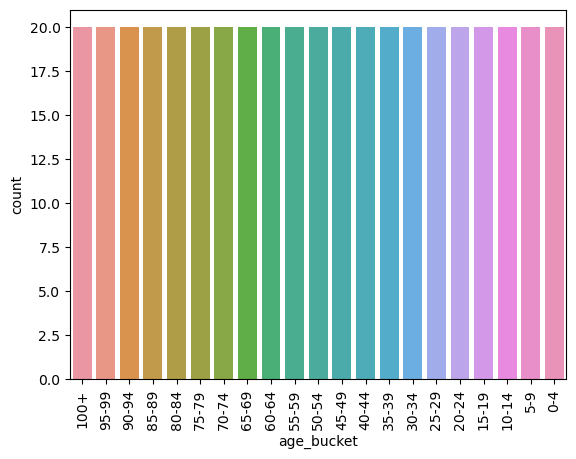

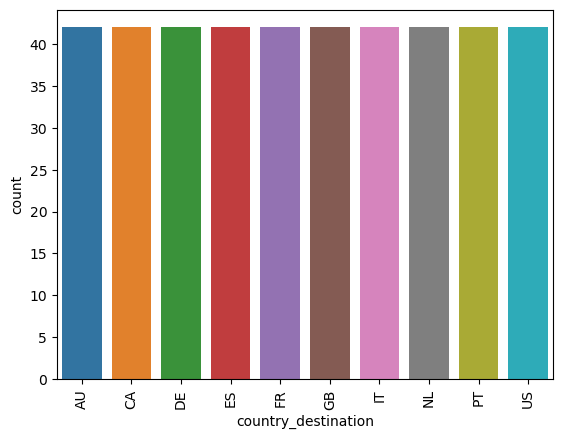

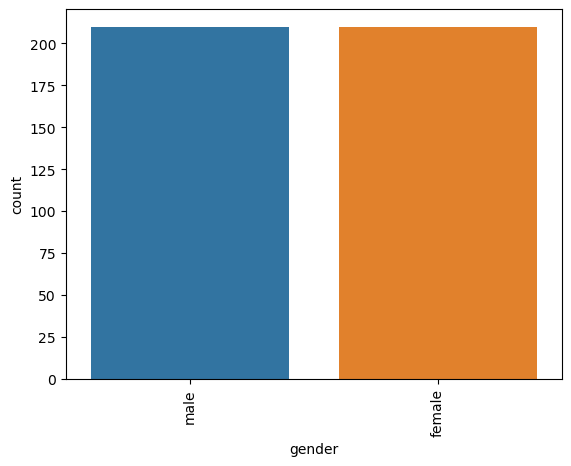

In [7]:
cat_col=['age_bucket', 'country_destination', 'gender']
for col in cat_col:
    sns.countplot(data=df_age,x=col)
    plt.xticks(rotation=90)
    plt.show()

1. From here we can see that population count is same in each age bucket
2. Population count is same in each country
3. Population count is same for both male and female
4. There is value for the year 2015 only
5. There are no null values

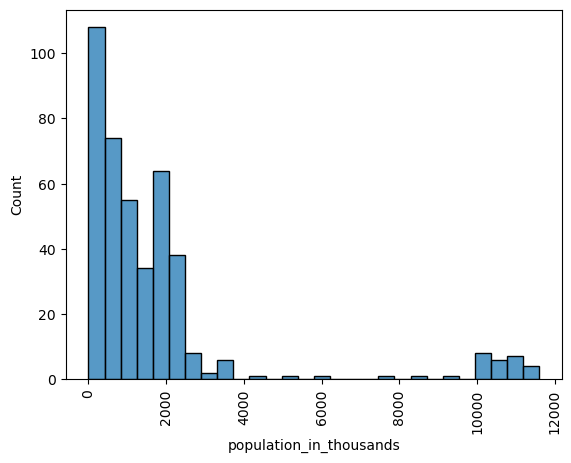

In [8]:
sns.histplot(data=df_age, x='population_in_thousands')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Check for duplicate rows
duplicate_rows = df_age[df_age.duplicated()]
duplicate_rows

,age_bucket,country_destination,gender,population_in_thousands,year


There are no duplicate rows

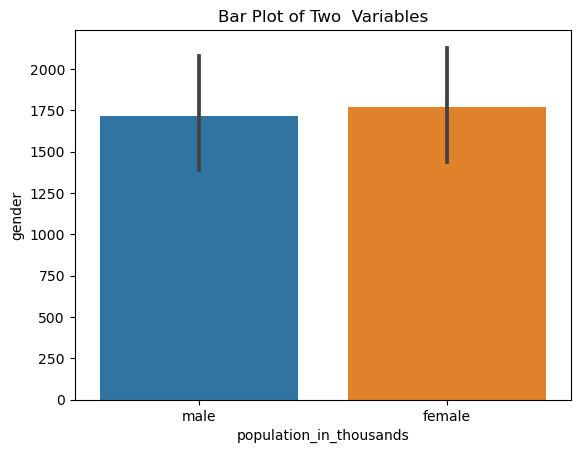

In [10]:
sns.barplot(data =df_age,y= 'population_in_thousands', x='gender')
plt.xlabel('population_in_thousands')
plt.ylabel('gender')
plt.title('Bar Plot of Two  Variables')
plt.show()

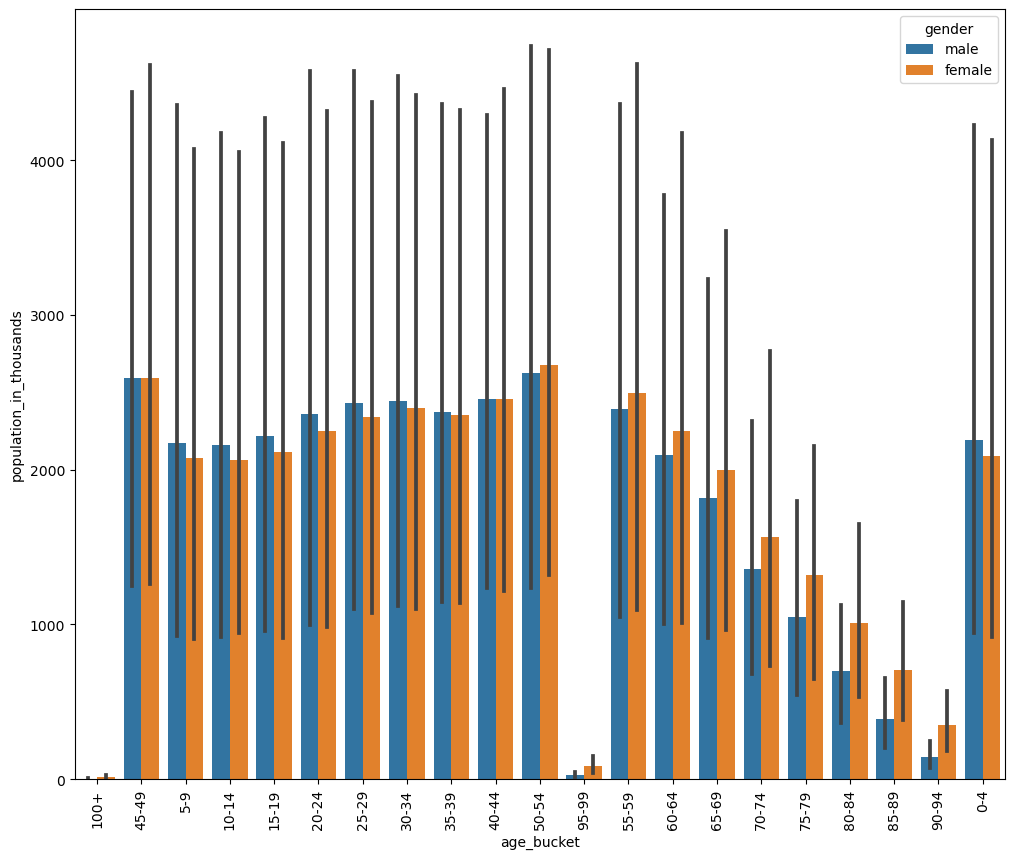

In [11]:
# order = df_age.sort_values(by='population_in_thousands', ascending=False)['age_bucket']
plt.figure(figsize=(12, 10))
sns.barplot(data=df_age, x='age_bucket',y='population_in_thousands', hue='gender',order=df_age['age_bucket'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

From here we can that age range 50-54 and 45-49 there are highest number of male and females tourist

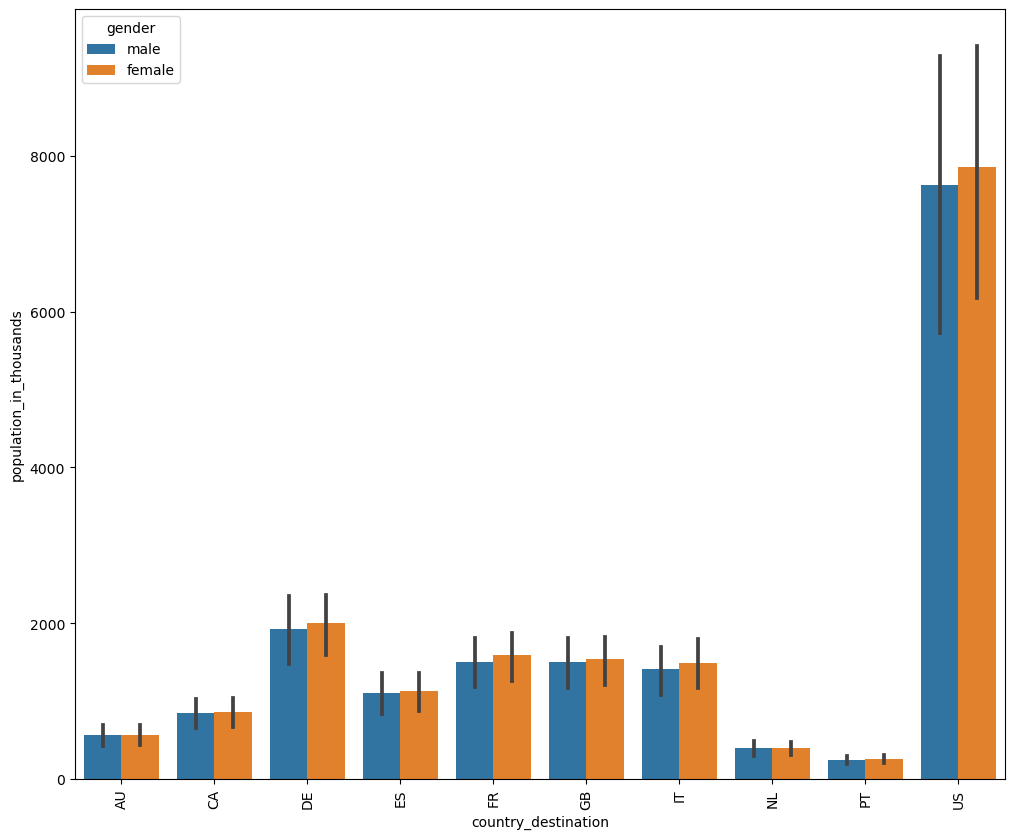

In [12]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df_age, x='country_destination',y='population_in_thousands', hue='gender')
plt.xticks(rotation=90)
plt.show()

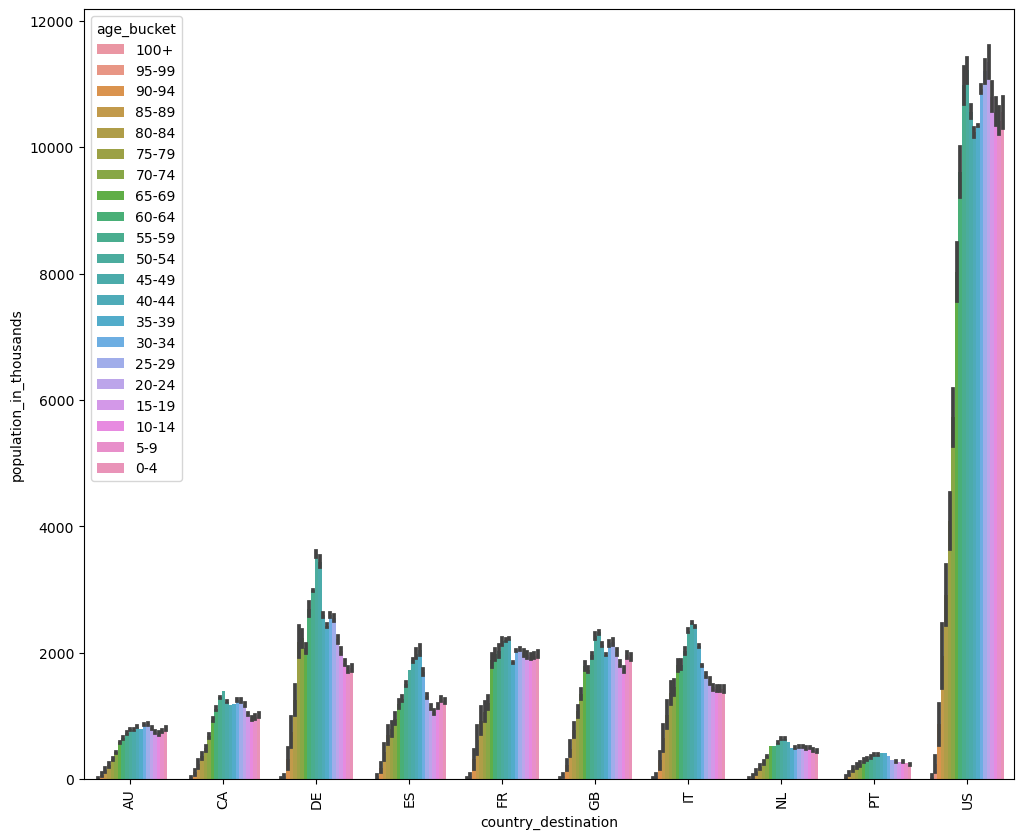

In [13]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df_age, x='country_destination',y='population_in_thousands', hue='age_bucket',order=df_age['country_destination'].value_counts().iloc[:12].index)
plt.xticks(rotation=90)
plt.show()

For US there are highest number fo male and female tourist

In [14]:
df_age.describe(include='all')

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,100+,AU,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [15]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [16]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 692.0+ bytes


In [17]:
df_country.isnull().sum()

country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64

In [18]:
df_country.describe(include='all')

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
count,10,10.000000,10.000000,10.000000,1.000000e+01,10,10.00000
unique,10,NaN,NaN,NaN,NaN,7,NaN
top,AU,NaN,NaN,NaN,NaN,eng,NaN
freq,1,NaN,NaN,NaN,NaN,4,NaN
mean,NaN,39.799398,-4.262446,7181.897800,2.973734e+06,NaN,50.49900
std,NaN,24.739112,63.700585,3941.141734,4.329619e+06,NaN,44.54169
min,NaN,-26.853388,-96.818146,0.000000,4.154300e+04,NaN,0.00000
25%,NaN,39.639090,-6.737559,7001.557600,2.580425e+05,NaN,0.00000
50%,NaN,44.053092,-0.139014,7603.632650,4.311960e+05,NaN,67.91500
75%,NaN,51.891219,9.163386,7842.357000,5.966865e+06,NaN,91.39500


In [19]:
df_country['destination_language '].value_counts()

destination_language 
eng    4
deu    1
spa    1
fra    1
ita    1
nld    1
por    1
Name: count, dtype: int64

In [20]:
df_country['country_destination'].value_counts()

country_destination
AU    1
CA    1
DE    1
ES    1
FR    1
GB    1
IT    1
NL    1
PT    1
US    1
Name: count, dtype: int64

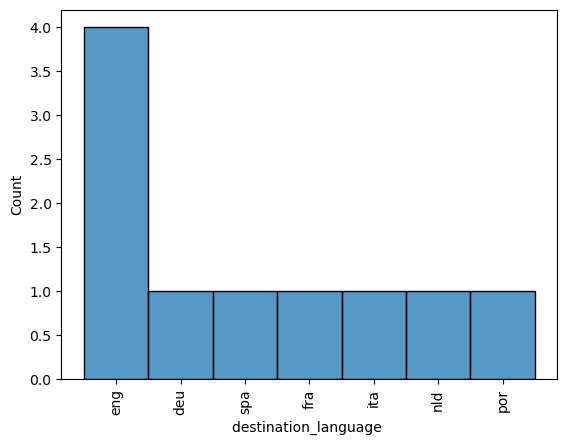

In [21]:
sns.histplot(data=df_country, x='destination_language ')
plt.xticks(rotation=90)
plt.show()

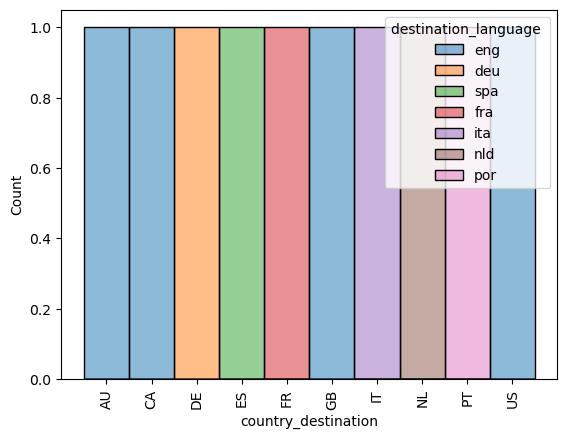

In [22]:
# plt.figure(figsize=(12, 10))
sns.histplot(data=df_country, x='country_destination', hue='destination_language ')
plt.xticks(rotation=90)
plt.show()

    we can see eng is most common language

In [23]:
df_session = pd.read_csv('sessions.csv')
df_session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [24]:
df_session.groupby(['user_id'])['device_type'].value_counts()

user_id     device_type                     
00023iyk9l  Mac Desktop                         36
            iPhone                               4
0010k6l0om  Mac Desktop                         63
001wyh0pz8  Android App Unknown Phone/Tablet    90
0028jgx1x1  -unknown-                           30
                                                ..
zzxox7jnrx  Windows Desktop                     89
zzy7t0y9cm  Windows Desktop                      8
zzysuoqg6x  Windows Desktop                      3
zzywmcn0jv  Windows Desktop                     51
zzzlylp57e  Windows Desktop                     74
Name: count, Length: 178236, dtype: int64

In [25]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [26]:
df_session['user_id'].value_counts()

user_id
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
              ... 
28ducycdim       1
g09kkvjc6h       1
n02i24pakw       1
ac2u4y37a4       1
zdb1vza42c       1
Name: count, Length: 135483, dtype: int64

In [27]:
df_session['action'].value_counts().iloc[:20]

action
show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
active                    188036
similar_listings_v2       168788
lookup                    162041
create                    155887
dashboard                 152952
header_userpic            141830
collections               124417
edit                      109083
campaigns                 105028
track_page_view            81117
Name: count, dtype: int64

In [28]:
df_session['action_type'].value_counts().iloc[:20]

action_type
view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: count, dtype: int64

In [29]:
df_session['action_detail'].value_counts().iloc[:20]

action_detail
view_search_results            1776885
p3                             1376550
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
dashboard                       152952
user_wishlists                  152672
header_userpic                  141830
message_thread                  132395
edit_profile                    108686
message_post                     87103
contact_host                     81041
unavailable_dates                77795
confirm_email_link               58422
create_user                      54878
Name: count, dtype: int64

In [30]:
df_session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

we can see many null values

In [31]:
df_session.shape

(10567737, 6)

In [32]:
df_session.describe(include='all')

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10488111,9441533,9441533,10567737,1.043171e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2768278,3560902,1776885,3594286,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.940581e+04
std,NaN,NaN,NaN,NaN,NaN,8.888424e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.147000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.444000e+03


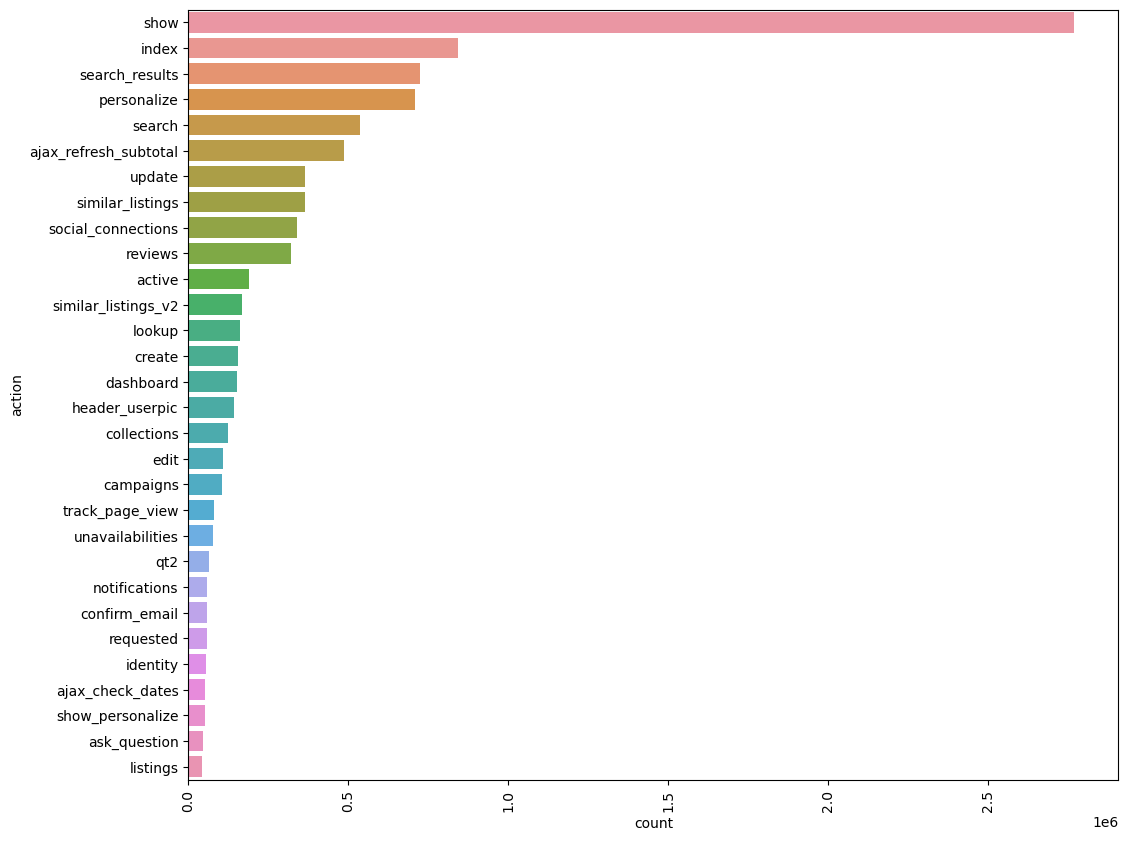

In [33]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.countplot(data=df_session, y='action', order=df_session['action'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

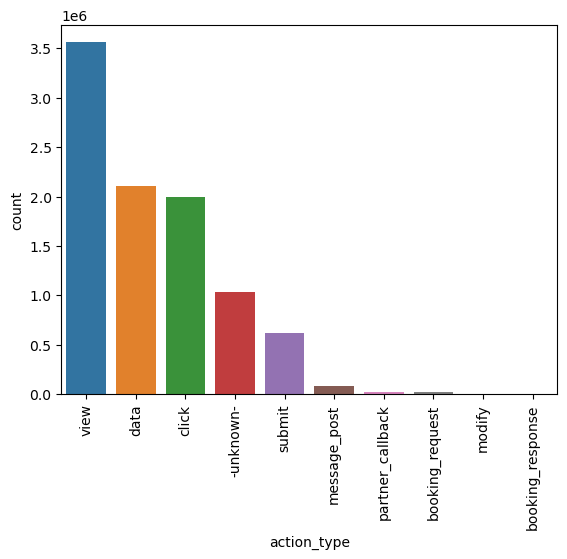

In [34]:
sns.countplot(x="action_type", data=df_session,order=df_session['action_type'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

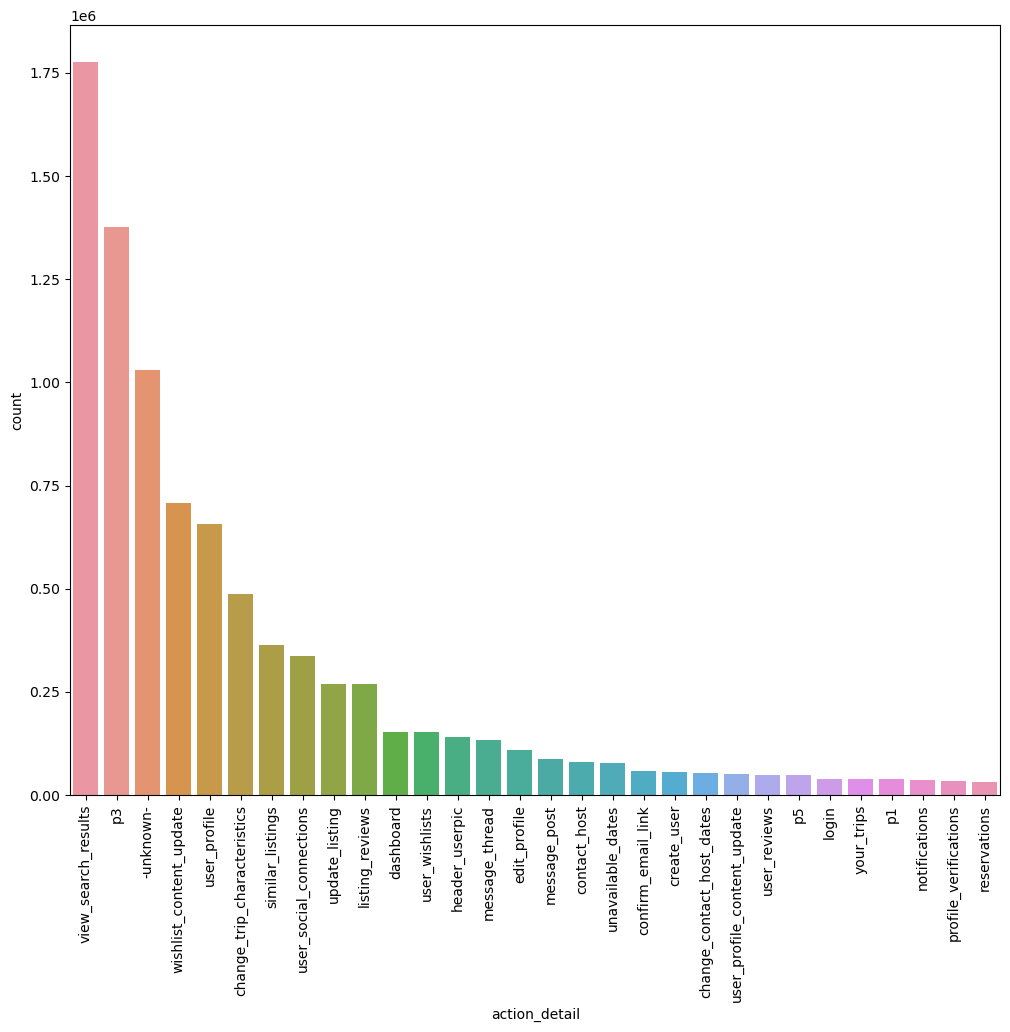

In [35]:
plt.figure(figsize=(12, 10))
sns.countplot(x="action_detail", data=df_session,order=df_session['action_detail'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

1) 'Show' is the most commonly used action 
2) 'View' is the most common action type followed by data and click
3) 'View_search_result' is the most common action detail followed by p3 and unknown

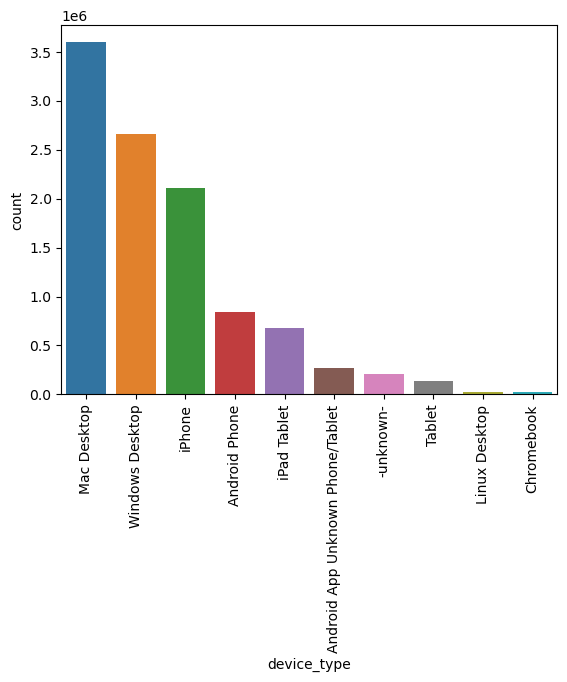

In [36]:
# plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.countplot(data=df_session, x='device_type',order=df_session['device_type'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

MAC and Windows desktop are most commonly used device type by user

In [37]:
df_session[df_session['device_type']=='Windows Desktop']['user_id'].value_counts().iloc[:30]

user_id
ht8alhs4lt    2335
wyv1imf8qw    2283
h0cjxc177k    2246
a0uhiojrra    2117
b1io359wpg    1731
s5ez13snz0    1685
e81qfos71y    1601
yu5bdalz2b    1600
93dulcecw0    1595
78mnangc8a    1538
tu41qoa28z    1403
c2vfjx8i7o    1353
h0fd2340p6    1313
z3mgcgzfun    1284
h1p33umgua    1257
2ye81t5oh4    1234
dtbwig9m34    1209
ppildsrvkl    1203
r8xsirhrjz    1131
yrpdpq4xqz    1092
0q949eqv5l    1081
8ap8pmyaak    1071
hsdq9pzk50    1060
ccse0ciy5m    1050
l4761qsja1    1038
jmew243yo2    1036
ewbx85fxtx    1027
6nxatkk69j    1015
6xx55fvyz7    1002
4rc49vi4mh    1001
Name: count, dtype: int64

In [38]:
df_session[df_session['device_type']=='Mac Desktop']['user_id'].value_counts().iloc[:30]

user_id
mxqbh3ykxl    2705
vcmr2jh5ix    2085
j2cvctvqve    1855
5vpuk5mssg    1833
r541x78s24    1792
qkbkunyzq7    1780
n4s6g3grzf    1771
bfiueza7rt    1742
0kj6w88xa2    1574
xboy92k1s2    1554
e4kn8hbtui    1528
bp4mwnlbxs    1526
aoshakhg7j    1477
baaqjavwrm    1419
wrccc4m1uw    1390
r6u8u03gz0    1330
t6q9ckz69s    1324
ca8jmor156    1254
kro83jmtt8    1243
szbvwk1u49    1242
lfr18hrckm    1232
otp2vllabl    1227
o2osqeke0g    1226
2xwvnz848a    1217
i2labk3w25    1209
llvyczd9hn    1202
fm89u29kv7    1185
55hbmqaela    1185
114290ylk6    1182
b9zw1lqfrn    1153
Name: count, dtype: int64

In [39]:
df_session.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [40]:
df_session = df_session.dropna(subset=['user_id'])
df_session.isnull().sum()

user_id                0
action             79480
action_type      1122957
action_detail    1122957
device_type            0
secs_elapsed      135483
dtype: int64

In [41]:
session1 = df_session.groupby(["user_id","action"]).agg({"action": "count"})
session1.head()

action
user_id    action                       
00023iyk9l ajax_refresh_subtotal       2
           callback                    1
           confirm_email               1
           dashboard                   4
           header_userpic              2

In [42]:
session2 = df_session.groupby(["user_id","action_type"]).agg({"action_type": "count"})

In [43]:
session3 = df_session.groupby(["user_id","action_detail"]).agg({"action_detail": "count"})

In [44]:
session1=session1.rename(columns={'action':'action_count'}).reset_index()
session2=session2.rename(columns={'action_type':'action_type_count'}).reset_index()
session3=session3.rename(columns={'action_detail':'action_detail_count'}).reset_index()
session1.head()

,user_id,action,action_count
0,00023iyk9l,ajax_refresh_subtotal,2
1,00023iyk9l,callback,1
2,00023iyk9l,confirm_email,1
3,00023iyk9l,dashboard,4
4,00023iyk9l,header_userpic,2


In [45]:
session1 = session1.pivot_table(index='user_id', columns='action', values='action_count').fillna(0)
session2 = session2.pivot_table(index='user_id', columns='action_type', values='action_type_count').fillna(0)
session3 = session3.pivot_table(index='user_id', columns='action_detail', values='action_detail_count').fillna(0)


For session we will select these columns:- show,index,search_results, personalize,search,ajax_refresh_subtotal,update,similar_listings,social_connections,reviews 

In [46]:
session1=session1[['show','index','search_results','personalize','search','ajax_refresh_subtotal','update','similar_listings','social_connections','reviews']]

In [47]:
session1.head()

action,show,index,search_results,personalize,search,ajax_refresh_subtotal,update,similar_listings,social_connections,reviews
user_id,,,,,,,,,,
00023iyk9l,9.0,4.0,1.0,4.0,0.0,2.0,0.0,3.0,0.0,0.0
0010k6l0om,20.0,5.0,8.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0
001wyh0pz8,6.0,2.0,0.0,0.0,66.0,0.0,1.0,0.0,2.0,0.0
0028jgx1x1,15.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,5.0
002qnbzfs5,232.0,115.0,0.0,0.0,125.0,0.0,13.0,0.0,72.0,13.0


From here we can not remove data as there correlation b/w view and data is 0.78
we will select top 5 columns  in action_type
view,data,click,-unknown- and submit as we are performing predictive modeling

In [48]:
session2=session2[['view','data','click','-unknown-','submit']]

In [49]:
session2.head()

action_type,view,data,click,-unknown-,submit
user_id,,,,,
00023iyk9l,21.0,9.0,4.0,0.0,0.0
0010k6l0om,17.0,9.0,16.0,5.0,0.0
001wyh0pz8,8.0,2.0,66.0,6.0,3.0
0028jgx1x1,15.0,5.0,9.0,1.0,1.0
002qnbzfs5,216.0,140.0,140.0,184.0,15.0


In [50]:
session3=session3[['view_search_results','p3','-unknown-','wishlist_content_update','user_profile','change_trip_characteristics','similar_listings','user_social_connections','update_listing',
'listing_reviews']]

In [51]:
session3.head()

action_detail,view_search_results,p3,-unknown-,wishlist_content_update,user_profile,change_trip_characteristics,similar_listings,user_social_connections,update_listing,listing_reviews
user_id,,,,,,,,,,
00023iyk9l,5.0,6.0,0.0,4.0,0.0,2.0,3.0,0.0,0.0,0.0
0010k6l0om,10.0,13.0,5.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0
001wyh0pz8,66.0,2.0,6.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
0028jgx1x1,9.0,9.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,5.0
002qnbzfs5,125.0,25.0,184.0,0.0,109.0,0.0,0.0,72.0,0.0,10.0


In [52]:
session4 = df_session.groupby(["user_id",'device_type']).agg({"device_type":'count'})
session4=session4.rename(columns={'device_type':'device_type_count'}).reset_index()

In [53]:

session4= session4.pivot_table(index='user_id', columns='device_type', values='device_type_count').fillna(0)
session4.head()

device_type,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
user_id,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775.0,0.0


In [54]:
session4=session4[['Mac Desktop','Windows Desktop','iPhone','Android Phone','iPad Tablet']]

In [55]:
session4.head()

device_type,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet
user_id,,,,,
00023iyk9l,36.0,0.0,4.0,0.0,0.0
0010k6l0om,63.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,1.0,0.0
002qnbzfs5,0.0,0.0,775.0,0.0,0.0


In [56]:
session5 = df_session.groupby("user_id").agg({"secs_elapsed":"sum"}).reset_index()
# session5=session5.rename(columns={'secs_elapsed':'time_duration'}).reset_index()
# session5[session5['user_id']=='0010k6l0om']
session5.head(10)

,user_id,secs_elapsed
0,00023iyk9l,867896.0
1,0010k6l0om,586543.0
2,001wyh0pz8,282965.0
3,0028jgx1x1,297010.0
4,002qnbzfs5,6487080.0
5,0031awlkjq,39574.0
6,0035hobuyj,5724670.0
7,00378ocvlh,1827164.0
8,00389675gq,2605711.0
9,003iamz20l,1590236.0


In [57]:
session_pivot = session1.merge(session2, on='user_id', how='outer').merge(session3, on='user_id', how='outer').merge(session4, on='user_id', how='outer').merge(session5, on='user_id', how='outer')

In [58]:
session_pivot.head()

,user_id,show,index,search_results,personalize,search,ajax_refresh_subtotal,update,similar_listings_x,social_connections,...,similar_listings_y,user_social_connections,update_listing,listing_reviews,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet,secs_elapsed
0,00023iyk9l,9.0,4.0,1.0,4.0,0.0,2.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,36.0,0.0,4.0,0.0,0.0,867896.0
1,0010k6l0om,20.0,5.0,8.0,8.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,586543.0
2,001wyh0pz8,6.0,2.0,0.0,0.0,66.0,0.0,1.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282965.0
3,0028jgx1x1,15.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,297010.0
4,002qnbzfs5,232.0,115.0,0.0,0.0,125.0,0.0,13.0,0.0,72.0,...,0.0,72.0,0.0,10.0,0.0,0.0,775.0,0.0,0.0,6487080.0


In [59]:
session_pivot.columns

Index(['user_id', 'show', 'index', 'search_results', 'personalize', 'search',
       'ajax_refresh_subtotal', 'update', 'similar_listings_x',
       'social_connections', 'reviews', 'view', 'data', 'click', '-unknown-_x',
       'submit', 'view_search_results', 'p3', '-unknown-_y',
       'wishlist_content_update', 'user_profile',
       'change_trip_characteristics', 'similar_listings_y',
       'user_social_connections', 'update_listing', 'listing_reviews',
       'Mac Desktop', 'Windows Desktop', 'iPhone', 'Android Phone',
       'iPad Tablet', 'secs_elapsed'],
      dtype='object')

In [60]:
df_train = pd.read_csv('train_users_2.csv')
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [62]:
df_train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [63]:
df_train['date_account_created']=pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking']=pd.to_datetime(df_train['date_first_booking'])
df_train['timestamp_first_active']=pd.to_datetime(df_train['timestamp_first_active'])

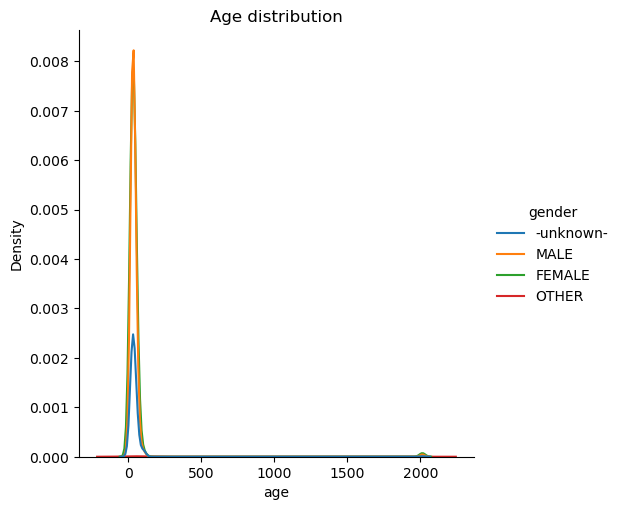

In [64]:
sns.displot(df_train, x='age', hue='gender', kind='kde')
plt.title('Age distribution')
plt.show()

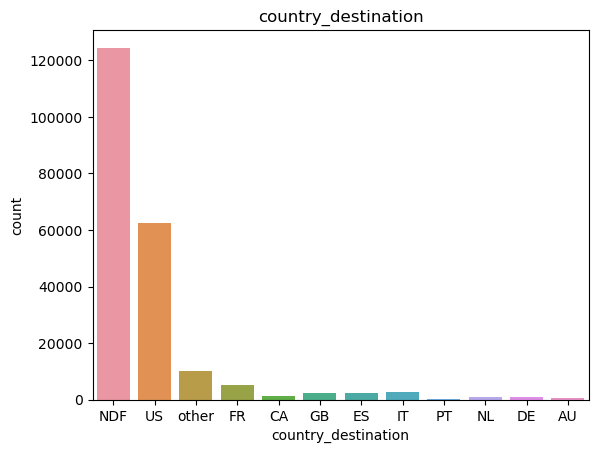

In [65]:
sns.countplot(x="country_destination", data=df_train)
plt.title("country_destination")
plt.show()

We can see that count of no booking or no destination found is very high

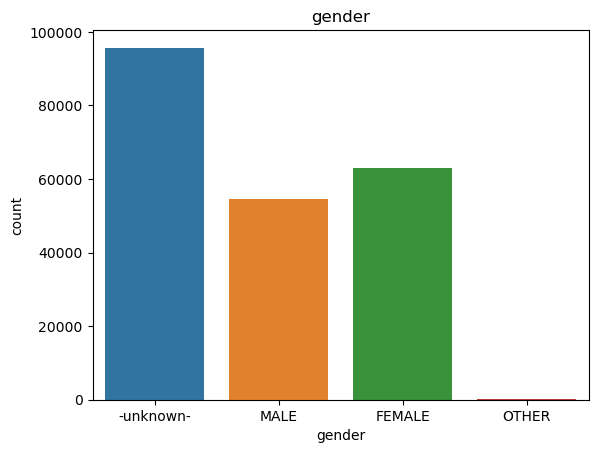

In [66]:
sns.countplot(x="gender", data=df_train)
plt.title("gender")
plt.show()

Most of the usersare unknown then female and then male

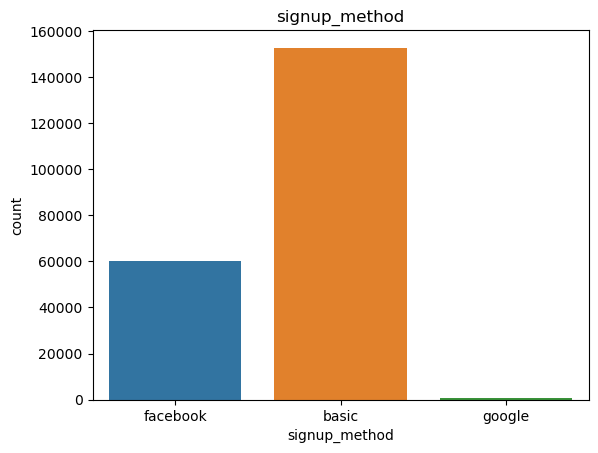

In [67]:
sns.countplot(x="signup_method", data=df_train)
plt.title("signup_method")
plt.show()

#### We can see that:-

Most of users either signup from basic or facebook.
Negligible population sign up through Google

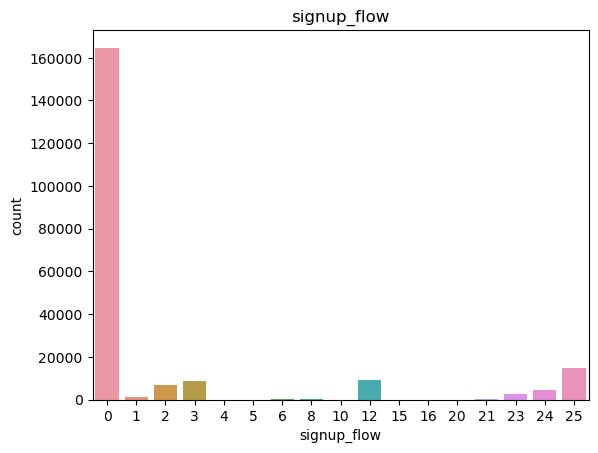

In [68]:
sns.countplot(x="signup_flow", data=df_train)
plt.title("signup_flow")
plt.show()

Almost 90 percent users havesign up flow 0

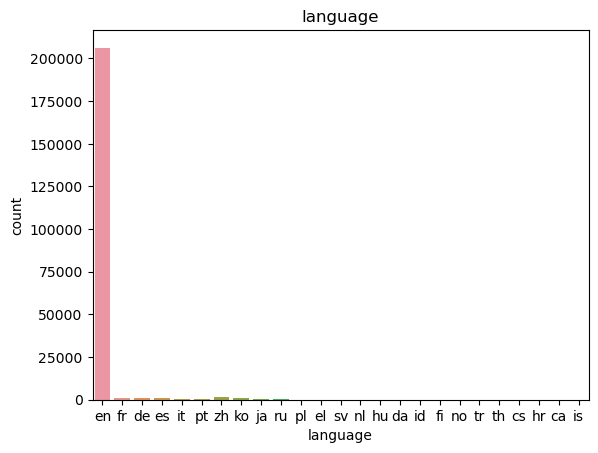

In [69]:
sns.countplot(x="language", data=df_train)
plt.title("language")
plt.show()

English is the most common language

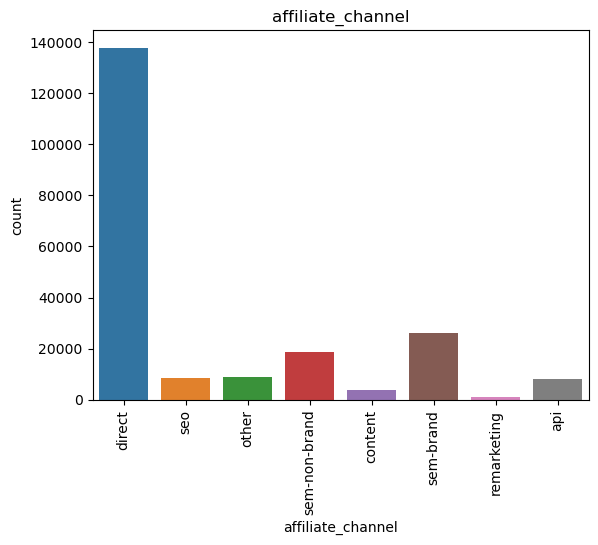

In [70]:
sns.countplot(x="affiliate_channel", data=df_train)
plt.xticks(rotation=90)
plt.title("affiliate_channel")
plt.show()

Direct is the most common affiliate channel

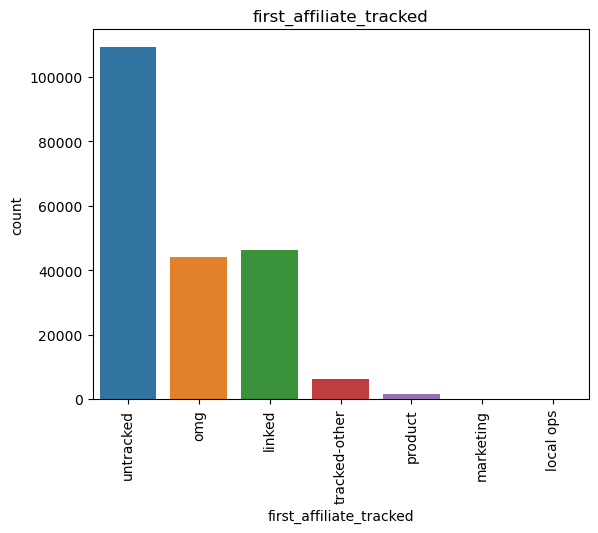

In [71]:
sns.countplot(x="first_affiliate_tracked", data=df_train)
plt.xticks(rotation=90)
plt.title("first_affiliate_tracked")
plt.show()

Most common first affiliate track in untracked

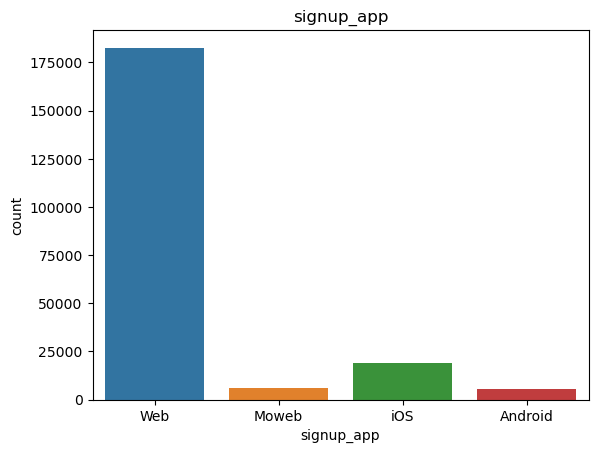

In [72]:
sns.countplot(x="signup_app", data=df_train)
plt.title("signup_app")
plt.show()

Majority of users used web as signup app

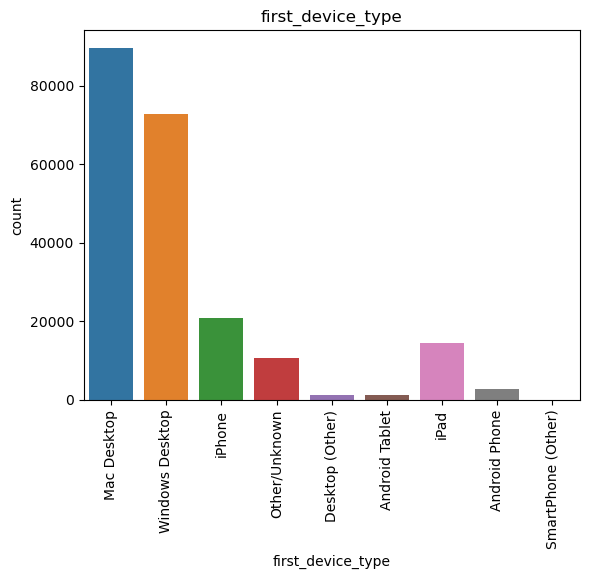

In [73]:
sns.countplot(x="first_device_type", data=df_train)
plt.xticks(rotation=90)
plt.title("first_device_type")
plt.show()

Mac and windows desktop are most common first device type

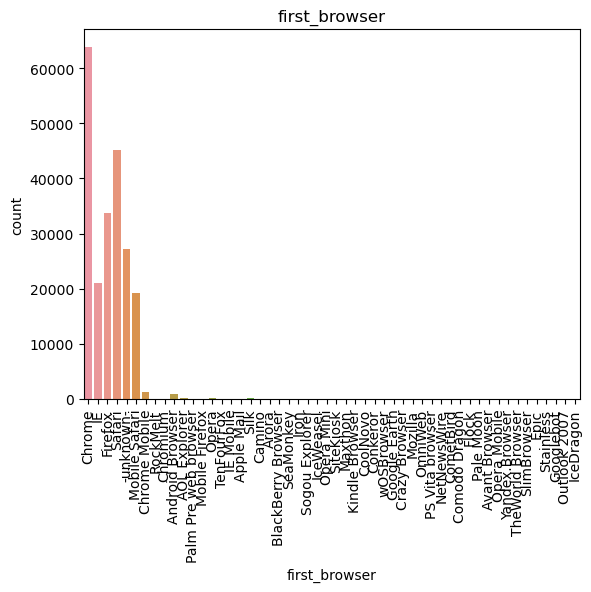

In [74]:
sns.countplot(x="first_browser", data=df_train)
plt.xticks(rotation=90)
plt.title("first_browser")
plt.show()

Majority of users use chrome,safari,firefox and unknown browses

In [75]:
df_train['affiliate_provider'].value_counts()

affiliate_provider
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: count, dtype: int64

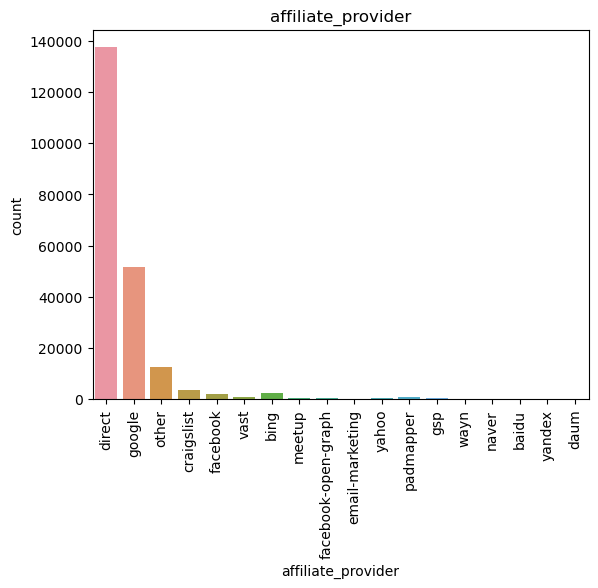

In [76]:
sns.countplot(x="affiliate_provider", data=df_train)
plt.xticks(rotation=90)
plt.title("affiliate_provider")
plt.show()

Direct and Google are the most common affiliate provider

#### Lets see the effect of each column against  country destination

In [77]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [78]:
df_train['date_account_created_year']=df_train['date_account_created'].dt.year
df_train['date_account_created_month']=df_train['date_account_created'].dt.month
df_train['date_account_created_day_name']=df_train['date_account_created'].dt.day_name()
df_train['date_account_created_day']=df_train['date_account_created'].dt.day
df_train.drop(['date_account_created'], axis=1,inplace=True)

In [79]:
df_train['date_first_booking_year']=df_train['date_first_booking'].dt.year
df_train['date_first_booking_month']=df_train['date_first_booking'].dt.month
df_train['date_first_booking_day_name']=df_train['date_first_booking'].dt.day_name()
df_train['date_first_booking_day']=df_train['date_first_booking'].dt.day
df_train.drop(['date_first_booking'], axis=1,inplace=True)

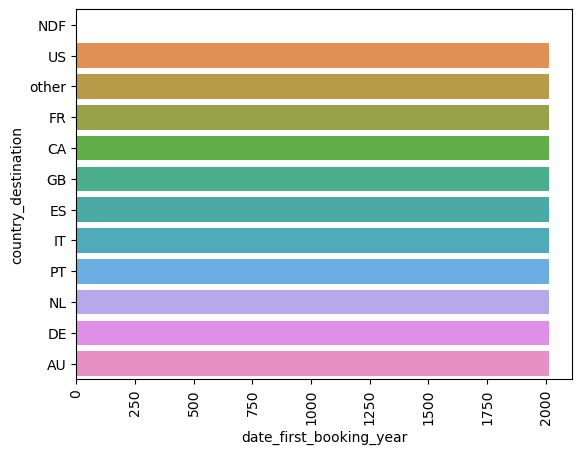

In [80]:

sns.barplot(data=df_train, y='country_destination',x='date_first_booking_year')
plt.xticks(rotation=90)
plt.show()

In [81]:
df1 =df_train['date_first_booking_year'].value_counts().reset_index()
df1

,date_first_booking_year,count
0,2014.0,32419
1,2013.0,31259
2,2012.0,16241
3,2011.0,5738
4,2015.0,1772
5,2010.0,1479


In [82]:
df_train[df_train['country_destination'].isin(['NDF', 'US', 'other', 'FR'])].groupby('country_destination')['date_first_booking_year'].value_counts()


country_destination  date_first_booking_year
FR                   2013.0                      1784
                     2014.0                      1607
                     2012.0                      1026
                     2011.0                       420
                     2010.0                       117
                     2015.0                        69
US                   2014.0                     22632
                     2013.0                     22011
                     2012.0                     11219
                     2011.0                      4023
                     2015.0                      1349
                     2010.0                      1142
other                2014.0                      4140
                     2013.0                      3481
                     2012.0                      1723
                     2011.0                       483
                     2015.0                       203
                     2010.0          

Most of the booking are done in year 2014 followed by 2013
1) For France 2013
2) For US 2014
FOR OTHERS 2013

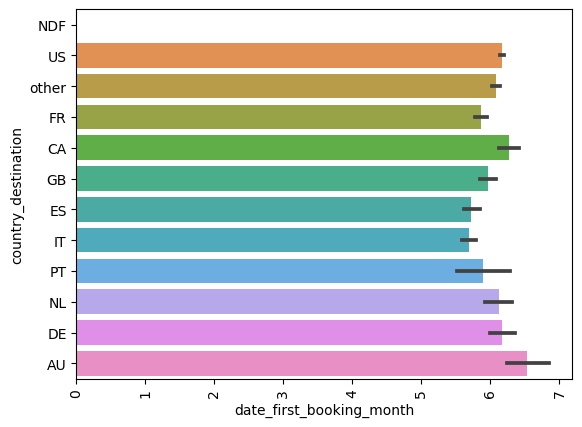

In [83]:
sns.barplot(data=df_train, y='country_destination',x='date_first_booking_month')
plt.xticks(rotation=90)
plt.show()

In [84]:
df_train['date_first_booking_month'].value_counts()

date_first_booking_month
6.0     10509
5.0     10478
4.0      8813
3.0      8391
7.0      7249
8.0      7055
2.0      6790
9.0      6598
1.0      6491
10.0     6184
11.0     5264
12.0     5086
Name: count, dtype: int64

Most of the booking are done from the month of may to june

In [85]:
df_train['date_first_booking_day_name'].value_counts()

date_first_booking_day_name
Wednesday    14374
Tuesday      14297
Thursday     13939
Friday       13299
Monday       12734
Saturday     10420
Sunday        9845
Name: count, dtype: int64

During tuesday and wednesday most of the booking are done

In [86]:
df_train['date_account_created_year'].value_counts()

date_account_created_year
2013    82960
2014    76466
2012    39462
2011    11775
2010     2788
Name: count, dtype: int64

Most of the account are created in the year 2013 and 2014

In [87]:
df_train['date_account_created_month'].value_counts()

date_account_created_month
6     27422
5     25912
4     21867
3     20325
1     17495
2     16582
9     15395
8     14611
7     13832
10    13476
12    13405
11    13129
Name: count, dtype: int64

In [88]:
df_train['date_account_created_day_name'].value_counts()

date_account_created_day_name
Tuesday      35085
Wednesday    34087
Monday       32862
Thursday     32570
Friday       29741
Sunday       24568
Saturday     24538
Name: count, dtype: int64

Here also tuesday and wednesday most of the accounts are created

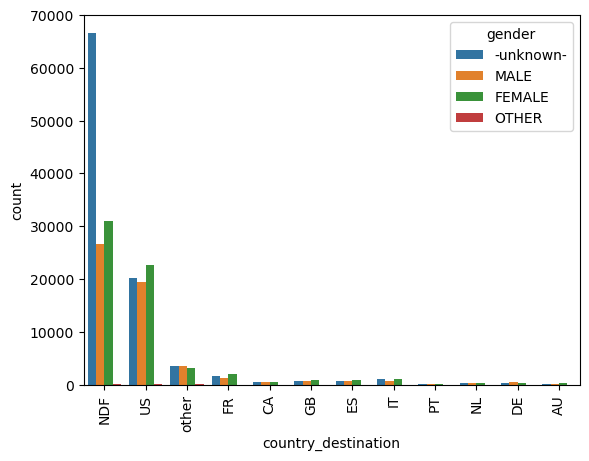

In [89]:
# plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='gender')
plt.xticks(rotation=90)
plt.show()

Most of the gender of daily users are unkown
In US,FR,GB female tourists are more


In [90]:
df_train.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,first_browser,country_destination,date_account_created_year,date_account_created_month,date_account_created_day_name,date_account_created_day,date_first_booking_year,date_first_booking_month,date_first_booking_day_name,date_first_booking_day
0,gxn3p5htnn,1970-01-01 05:34:50.319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,Chrome,NDF,2010,6,Monday,28,NaN,NaN,NaN,NaN
1,820tgsjxq7,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,Chrome,NDF,2011,5,Wednesday,25,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,IE,US,2010,9,Tuesday,28,2010.0,8.0,Monday,2.0
3,bjjt8pjhuk,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,Firefox,other,2011,12,Monday,5,2012.0,9.0,Saturday,8.0
4,87mebub9p4,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,Chrome,US,2010,9,Tuesday,14,2010.0,2.0,Thursday,18.0


In [91]:
df_train.describe() 

,timestamp_first_active,age,signup_flow,date_account_created_year,date_account_created_month,date_account_created_day,date_first_booking_year,date_first_booking_month,date_first_booking_day
count,213451,125461.000000,213451.000000,213451.000000,213451.000000,213451.000000,88908.000000,88908.000000,88908.000000
mean,1970-01-01 05:35:30.850417367,49.668335,3.267387,2013.023846,6.022459,15.869230,2013.042842,6.110597,15.644509
min,1970-01-01 05:34:50.319043255,1.000000,0.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000
25%,1970-01-01 05:35:21.225073327,28.000000,0.000000,2012.000000,3.000000,8.000000,2012.000000,4.000000,8.000000
50%,1970-01-01 05:35:30.911061308,34.000000,0.000000,2013.000000,6.000000,16.000000,2013.000000,6.000000,16.000000
75%,1970-01-01 05:35:40.306082494,43.000000,0.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000
max,1970-01-01 05:35:40.630235824,2014.000000,25.000000,2014.000000,12.000000,31.000000,2015.000000,12.000000,31.000000
std,NaN,155.666612,7.637707,0.938489,3.236690,8.740107,1.016404,3.180892,8.725647


We can see there are outliers in age

In [92]:
df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')  # Convert 'age' to numeric, handle errors by setting them to NaN
def update_age(row):
    if 200 <=row['age'] <= 2014:
        return 2014 - row['age']
    return row['age']

df_train['age'] = df_train.apply(update_age, axis=1)

In [93]:
df_train.describe()

,timestamp_first_active,age,signup_flow,date_account_created_year,date_account_created_month,date_account_created_day,date_first_booking_year,date_first_booking_month,date_first_booking_day
count,213451,125461.000000,213451.000000,213451.000000,213451.000000,213451.000000,88908.000000,88908.000000,88908.000000
mean,1970-01-01 05:35:30.850417367,37.199249,3.267387,2013.023846,6.022459,15.869230,2013.042842,6.110597,15.644509
min,1970-01-01 05:34:50.319043255,0.000000,0.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000
25%,1970-01-01 05:35:21.225073327,28.000000,0.000000,2012.000000,3.000000,8.000000,2012.000000,4.000000,8.000000
50%,1970-01-01 05:35:30.911061308,34.000000,0.000000,2013.000000,6.000000,16.000000,2013.000000,6.000000,16.000000
75%,1970-01-01 05:35:40.306082494,43.000000,0.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000
max,1970-01-01 05:35:40.630235824,150.000000,25.000000,2014.000000,12.000000,31.000000,2015.000000,12.000000,31.000000
std,NaN,14.224017,7.637707,0.938489,3.236690,8.740107,1.016404,3.180892,8.725647


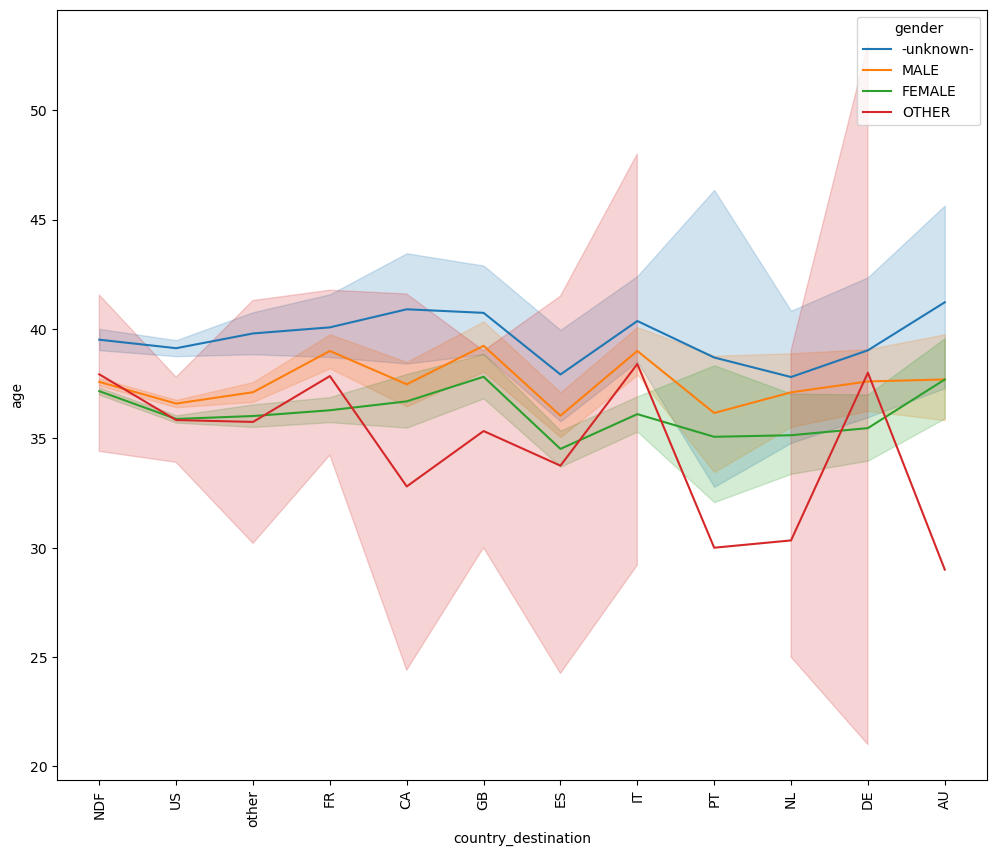

In [94]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=df_train,x='country_destination',y='age',hue='gender')
plt.xticks(rotation=90)
plt.show()

We have removed the outliers for age

In [95]:
# df_train[df_train['country_destination'].isin(['US', 'other', 'FR','CA','AU','DE','GB'])].groupby('country_destination')['age'].value_counts()

# Group by 'country_destination' and get value counts for 'age'
country_age_counts = df_train.groupby('country_destination')['age'].value_counts().reset_index(name='count')

# Sort the age counts within each country group in descending order
country_age_counts['rank'] = country_age_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)

# Select the top 5 ages for each country
top_5_ages_per_country = country_age_counts[country_age_counts['rank'] <= 5]

# Drop the 'rank' column if you don't need it in the final result
top_5_ages_per_country = top_5_ages_per_country.drop(columns=['rank'])

print(top_5_ages_per_country)


    country_destination   age  count
0                    AU  30.0     35
1                    AU  29.0     28
2                    AU  33.0     21
3                    AU  27.0     21
4                    AU  28.0     20
57                   CA  29.0     64
58                   CA  31.0     63
59                   CA  30.0     58
60                   CA  32.0     53
61                   CA  34.0     48
118                  DE  31.0     48
119                  DE  28.0     44
120                  DE  32.0     41
121                  DE  26.0     36
122                  DE  30.0     36
180                  ES  32.0    103
181                  ES  29.0     88
182                  ES  30.0     86
183                  ES  25.0     78
184                  ES  34.0     76
246                  FR  31.0    189
247                  FR  32.0    178
248                  FR  30.0    171
249                  FR  29.0    161
250                  FR  28.0    160
320                  GB  31.0     84
3

We can see that age range of tourist are in the range of 25 to 35 in the given countries
1) For US and AU age group of 30 is dominating
2) For PT age group of 34 is dominating
3) For NL and IT age group of 33 is dominating
4) For FR,DE and GB age group of 31 is dominating
5) For ES age group of 32 is dominating
6) For CA age group of 30 is dominating

For users who have not book any there also age group 28 is dominating

In [96]:
df_train['signup_method'].value_counts()

signup_method
basic       152897
facebook     60008
google         546
Name: count, dtype: int64

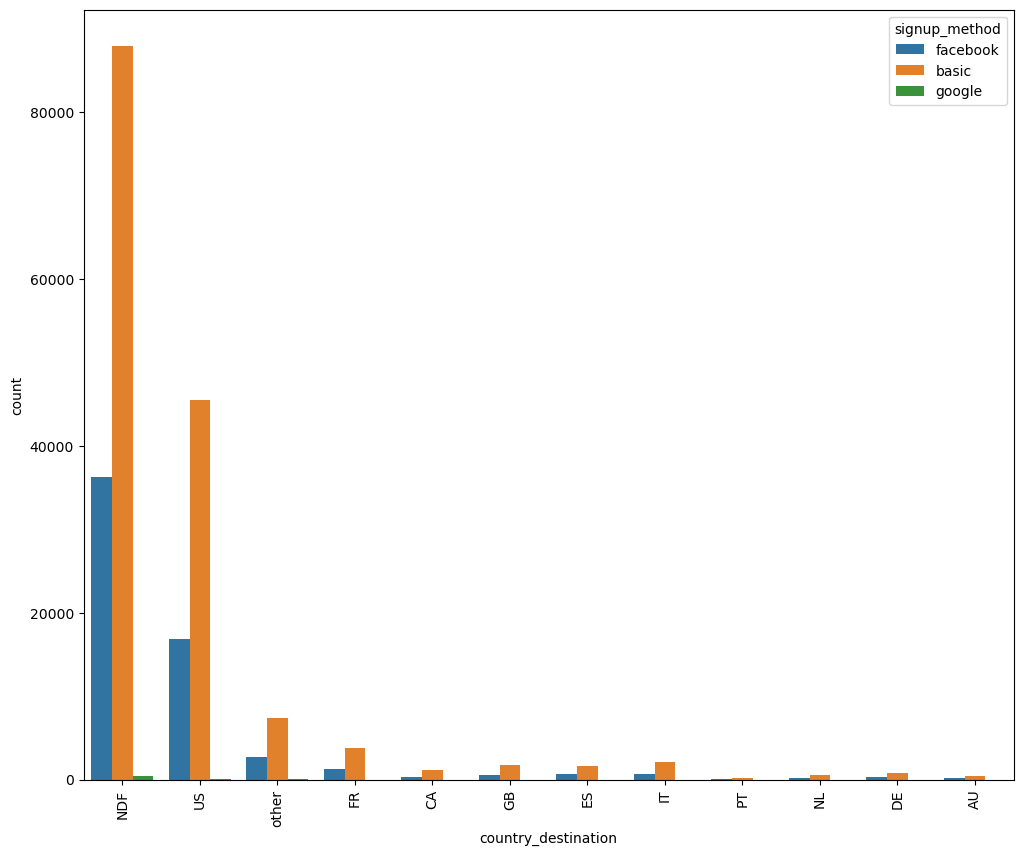

In [97]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='signup_method')
plt.xticks(rotation=90)
plt.show()

We can see basic is most common sign up method in all countries followed by facebook and google

In [98]:
df_train['signup_flow'].value_counts()

signup_flow
0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: count, dtype: int64

In [99]:

country_signupflow_counts = df_train.groupby('country_destination')['signup_flow'].value_counts().reset_index(name='count')


country_signupflow_counts['rank'] = country_signupflow_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_3_signupflow_per_country = country_signupflow_counts[country_signupflow_counts['rank'] <= 3]


top_3_signupflow_per_country = top_3_signupflow_per_country.drop(columns=['rank'])

print(top_3_signupflow_per_country)

    country_destination  signup_flow  count
0                    AU            0    433
1                    AU            3     28
2                    AU            2     24
10                   CA            0   1120
11                   CA            3     99
12                   CA            2     88
22                   DE            0    852
23                   DE            3     77
24                   DE            2     55
31                   ES            0   1772
32                   ES            3    172
33                   ES            2    105
42                   FR            0   4047
43                   FR            3    361
44                   FR            2    268
53                   GB            0   1902
54                   GB            3    152
55                   GB           25     84
65                   IT            0   2285
66                   IT            3    201
67                   IT           25    119
77                  NDF         

For every destination country sign up flow 0 is highest followed by 3 except PT where sign up flow is 0 is followed by 25

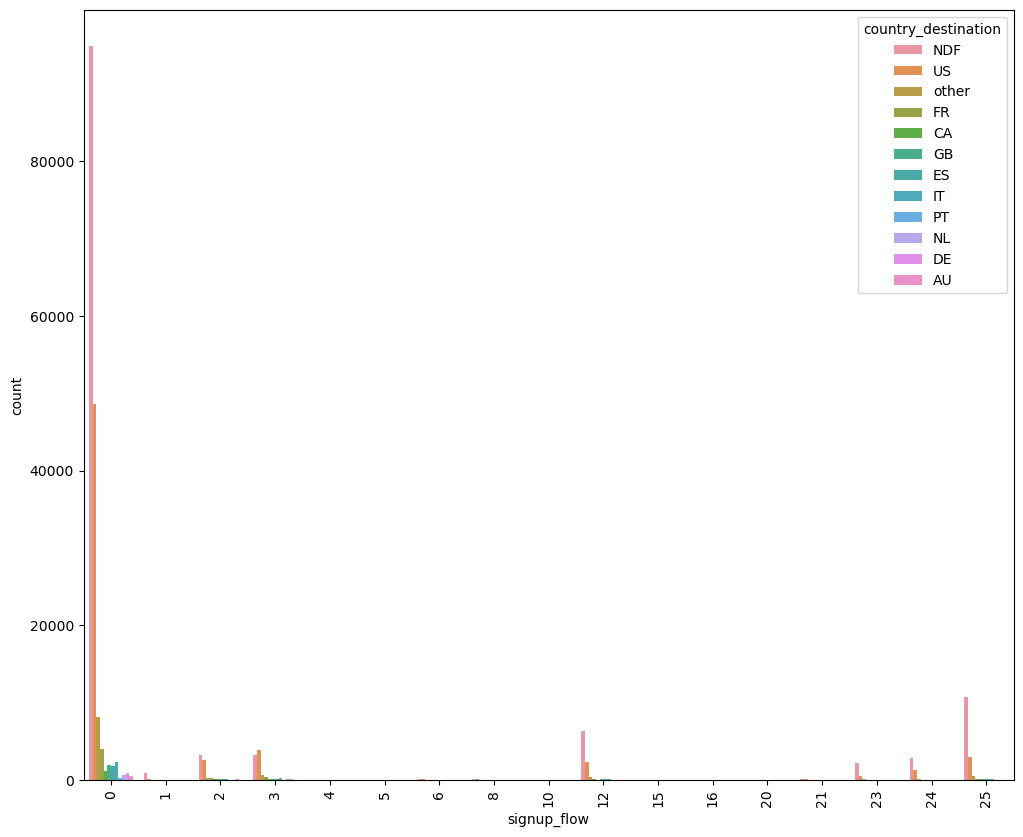

In [100]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, hue='country_destination',x='signup_flow')
plt.xticks(rotation=90)
plt.show()

Signup flow count 0 almost highest in all the countries

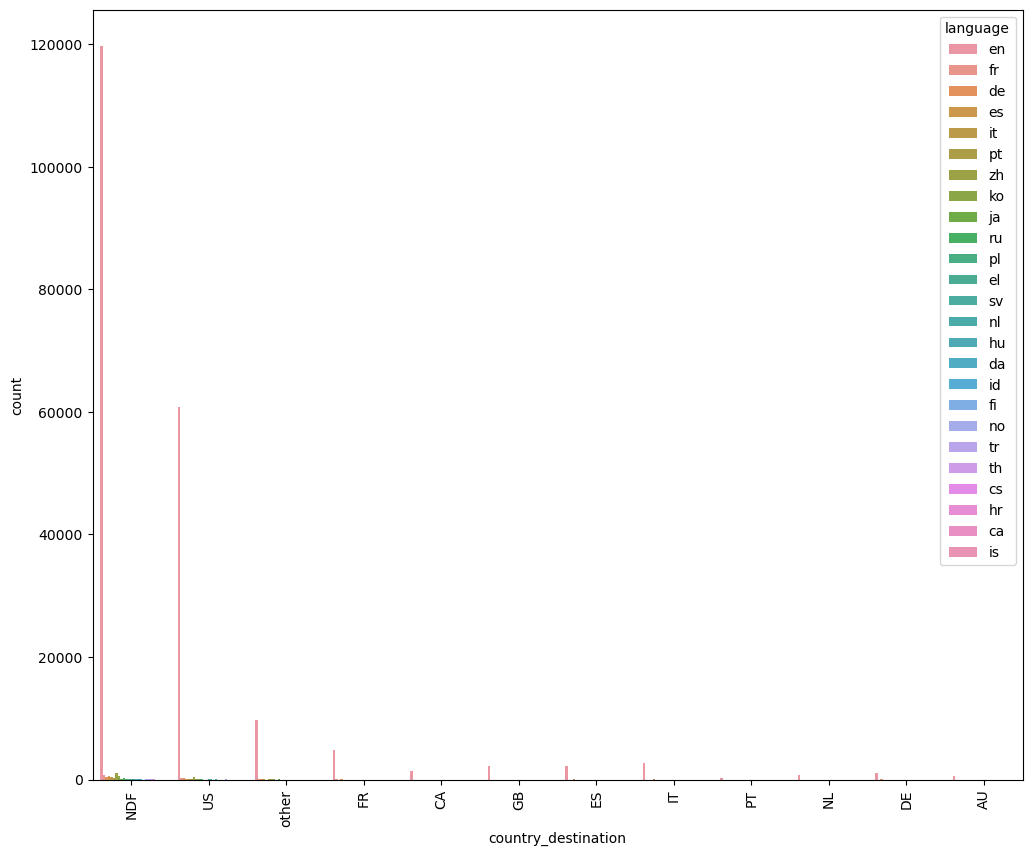

In [101]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='language')
plt.xticks(rotation=90)
plt.show()

In [102]:

country_language_counts = df_train.groupby('country_destination')['language'].value_counts().reset_index(name='count')


country_language_counts['rank'] = country_language_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_5_language_per_country = country_language_counts[country_language_counts['rank'] <= 5]


top_5_language_per_country = top_5_language_per_country.drop(columns=['rank'])

print(top_5_language_per_country)

    country_destination language   count
0                    AU       en     531
1                    AU       de       3
2                    AU       zh       2
3                    AU       fr       2
4                    AU       ko       1
5                    CA       en    1412
6                    CA       fr       7
7                    CA       ja       2
8                    CA       zh       2
9                    CA       ko       2
13                   DE       en    1016
14                   DE       de      24
15                   DE       fr       8
16                   DE       es       6
17                   DE       zh       2
21                   ES       en    2183
22                   ES       es      20
23                   ES       fr      11
24                   ES       de       7
25                   ES       it       6
36                   FR       en    4882
37                   FR       fr      69
38                   FR       es      18
39              

1) We can see that English is most common language among tourist
2) For AU and DE de is second most common language
3) For CA,GB and FR fr is second most common language
4) For ES and PT es is second most common language
5) For IT it is second most common language
6) For NL nl is second most common language
7) For US, OTHER and those who have not booked for them zh is second most common language


In [103]:
country_affiliate_channel_counts = df_train.groupby('country_destination')['affiliate_channel'].value_counts().reset_index(name='count')


country_affiliate_channel_counts['rank'] = country_affiliate_channel_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_5_affiliate_channel_per_country = country_affiliate_channel_counts[country_affiliate_channel_counts['rank'] <= 5]


top_5_affiliate_channel_per_country = top_5_affiliate_channel_per_country.drop(columns=['rank'])

print(top_5_affiliate_channel_per_country)

   country_destination affiliate_channel  count
0                   AU            direct    363
1                   AU         sem-brand     65
2                   AU     sem-non-brand     59
3                   AU               seo     17
4                   AU               api     17
8                   CA            direct    945
9                   CA         sem-brand    154
10                  CA     sem-non-brand    147
11                  CA             other     70
12                  CA               seo     58
16                  DE            direct    699
17                  DE         sem-brand    137
18                  DE     sem-non-brand    112
19                  DE               seo     46
20                  DE             other     35
24                  ES            direct   1536
25                  ES         sem-brand    278
26                  ES     sem-non-brand    180
27                  ES               seo    118
28                  ES               api

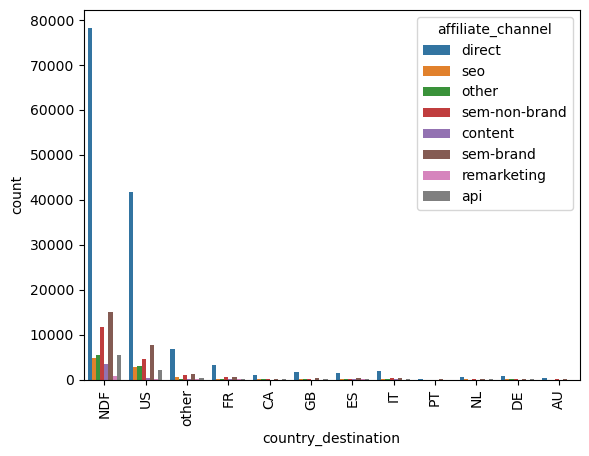

In [104]:
# plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='affiliate_channel')
plt.xticks(rotation=90)
plt.show()
# df_train.columns

Direct,sem-brand and sem-non-brand are top 3 affiliate channels all the destination countries here direct ranks one in all the countries

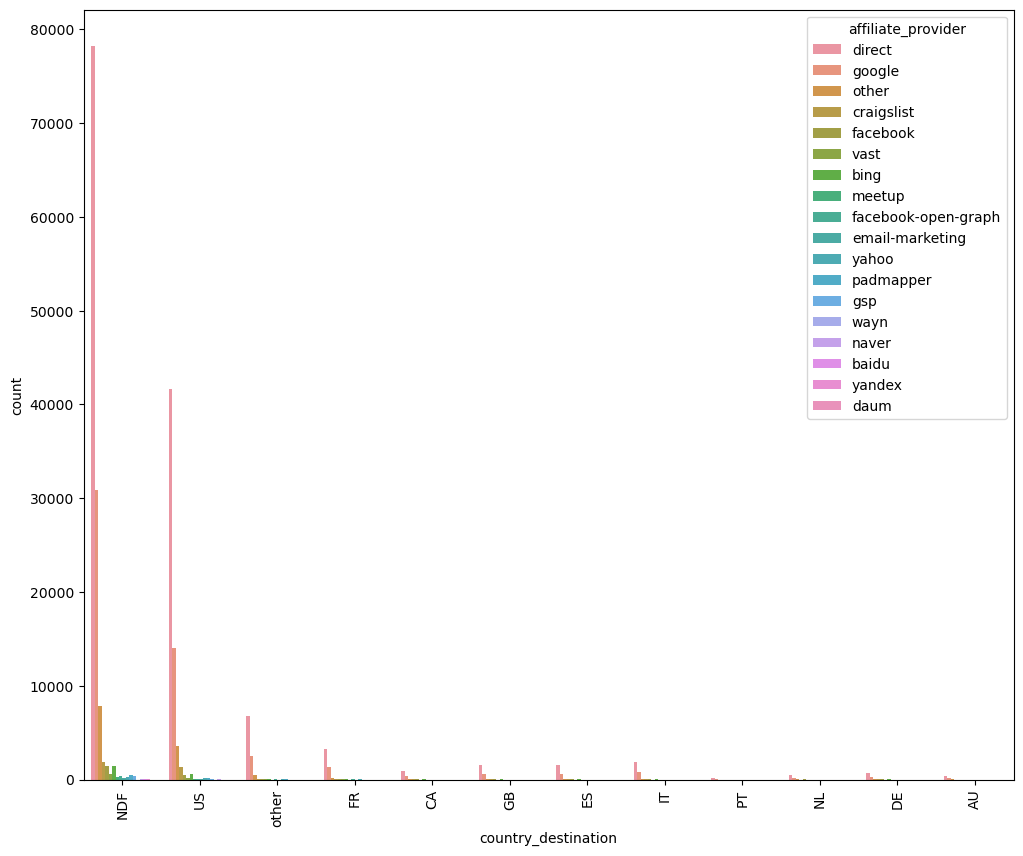

In [105]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='affiliate_provider')
plt.xticks(rotation=90)
plt.show()

In [106]:
country_affiliate_provider_counts = df_train.groupby('country_destination')['affiliate_provider'].value_counts().reset_index(name='count')


country_affiliate_provider_counts['rank'] = country_affiliate_provider_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_5_affiliate_provider_per_country = country_affiliate_provider_counts[country_affiliate_provider_counts['rank'] <= 3]


top_5_affiliate_provider_per_country = top_5_affiliate_provider_per_country.drop(columns=['rank'])

print(top_5_affiliate_provider_per_country)

    country_destination affiliate_provider  count
0                    AU             direct    362
1                    AU             google    135
2                    AU              other     23
9                    CA             direct    943
10                   CA             google    344
11                   CA              other     59
19                   DE             direct    699
20                   DE             google    263
21                   DE              other     37
29                   ES             direct   1528
30                   ES             google    557
31                   ES              other     89
39                   FR             direct   3281
40                   FR             google   1388
41                   FR              other    145
53                   GB             direct   1576
54                   GB             google    586
55                   GB              other     83
65                   IT             direct   1855


For all the countries  direct,google and other are top 3 affiliate provider
where direct ranks one in all the countries

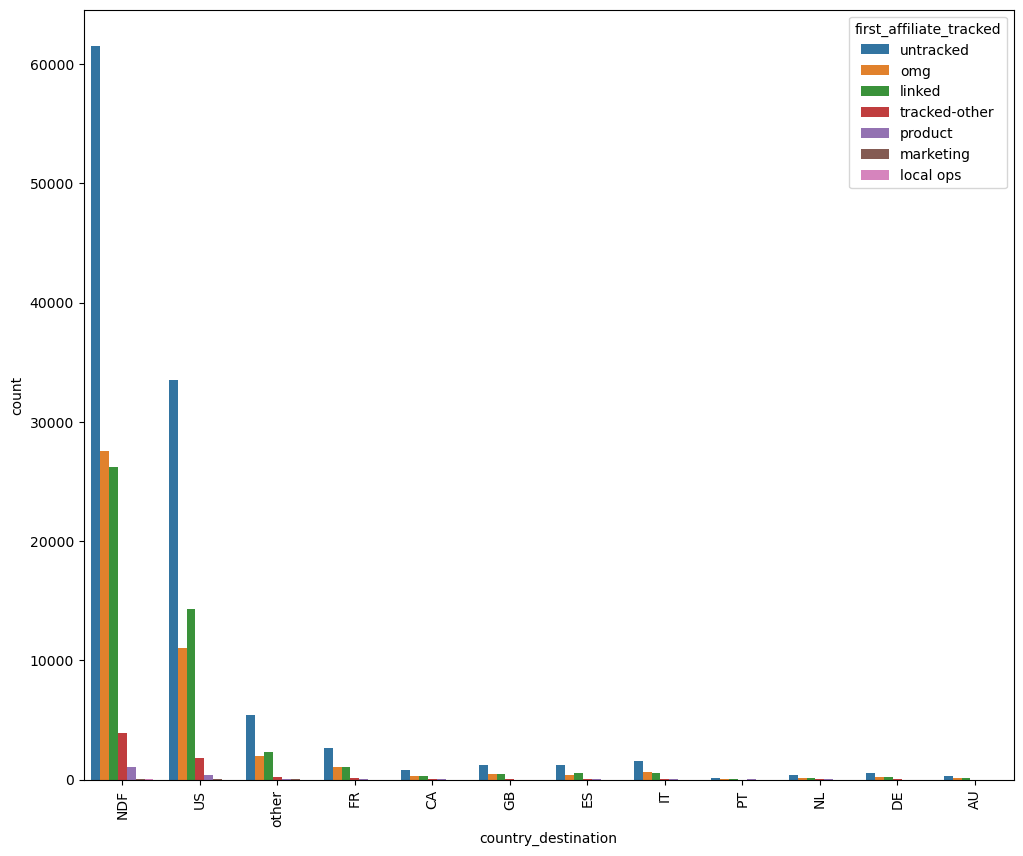

In [107]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='first_affiliate_tracked')
plt.xticks(rotation=90)
plt.show()

In [108]:
country_first_affiliate_tracked_counts = df_train.groupby('country_destination')['first_affiliate_tracked'].value_counts().reset_index(name='count')


country_first_affiliate_tracked_counts['rank'] = country_first_affiliate_tracked_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_5_first_affiliate_tracked_per_country = country_first_affiliate_tracked_counts[country_first_affiliate_tracked_counts['rank'] <= 5]


top_5_first_affiliate_tracked_per_country = top_5_first_affiliate_tracked_per_country.drop(columns=['rank'])

print(top_5_first_affiliate_tracked_per_country)

   country_destination first_affiliate_tracked  count
0                   AU               untracked    288
1                   AU                     omg    119
2                   AU                  linked    109
3                   AU           tracked-other      6
4                   AU                 product      4
6                   CA               untracked    777
7                   CA                  linked    296
8                   CA                     omg    268
9                   CA           tracked-other     39
10                  CA                 product     10
12                  DE               untracked    579
13                  DE                  linked    235
14                  DE                     omg    201
15                  DE           tracked-other     23
16                  DE                 product      3
17                  ES               untracked   1196
18                  ES                  linked    549
19                  ES      

1) Untracked is most common first_affiliate_tracked in all the countries
2) For AU,PT,IT and NL omg and linked 2nd most common first_affiliate_tracked
3) For CA,DE,US,ES,FR and other linked and omg 2nd most common first_affiliate_tracked

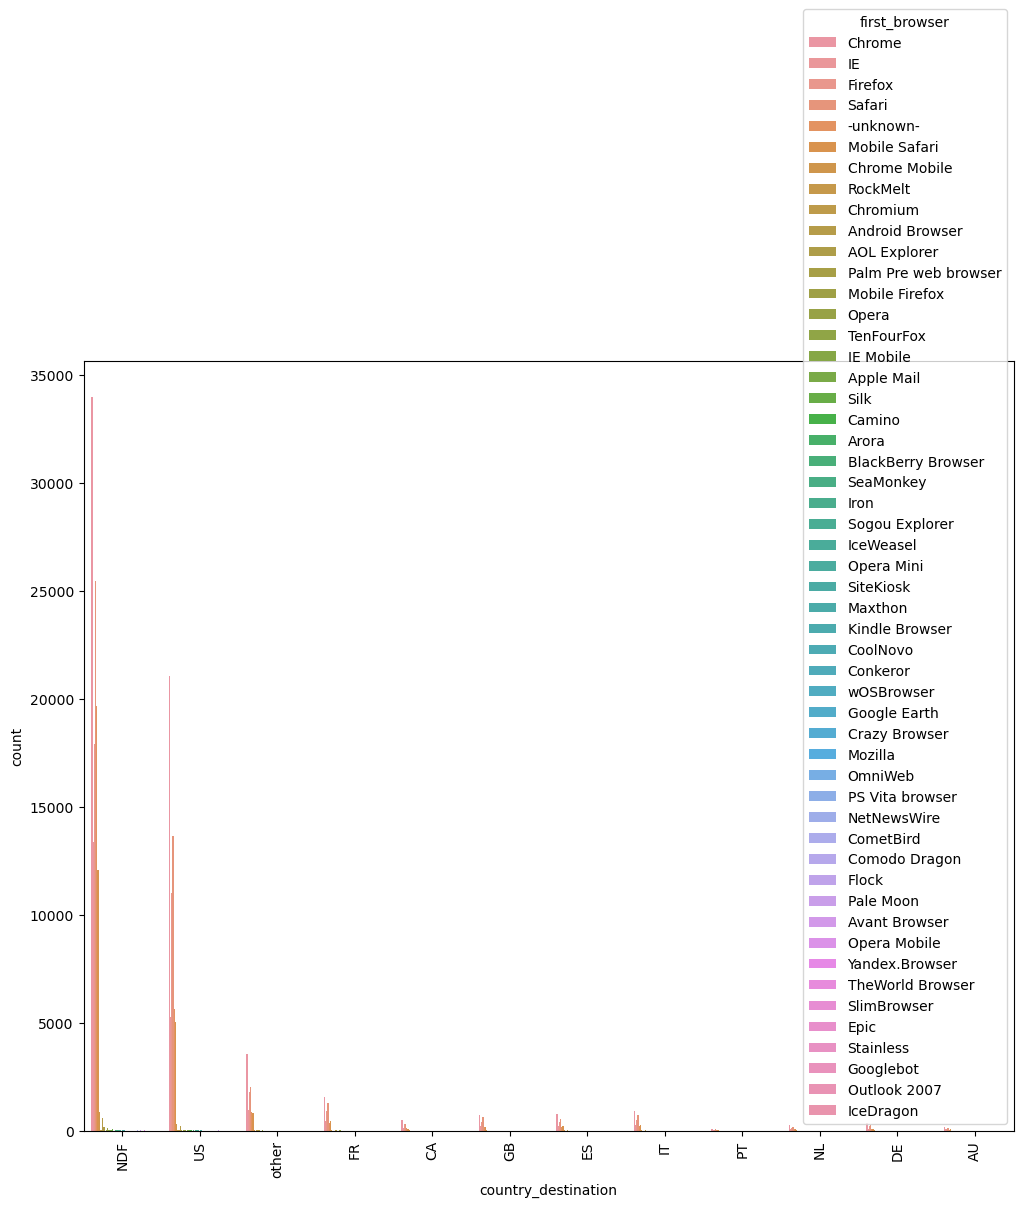

In [109]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='first_browser')
plt.xticks(rotation=90)
plt.show()

In [110]:
country_first_browser_counts = df_train.groupby('country_destination')['first_browser'].value_counts().reset_index(name='count')


country_first_browser_counts['rank'] = country_first_browser_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_5_first_browser_per_country = country_first_browser_counts[country_first_browser_counts['rank'] <= 5]


top_5_first_browser_per_country = top_5_first_browser_per_country.drop(columns=['rank'])

print(top_5_first_browser_per_country)

    country_destination  first_browser  count
0                    AU         Chrome    154
1                    AU         Safari    138
2                    AU        Firefox     94
3                    AU  Mobile Safari     56
4                    AU             IE     54
9                    CA         Chrome    486
10                   CA         Safari    321
11                   CA        Firefox    291
12                   CA             IE    120
13                   CA      -unknown-     98
23                   DE         Chrome    361
24                   DE         Safari    248
25                   DE        Firefox    202
26                   DE             IE     95
27                   DE      -unknown-     76
34                   ES         Chrome    755
35                   ES         Safari    526
36                   ES        Firefox    396
37                   ES             IE    210
38                   ES  Mobile Safari    190
46                   FR         Ch

For all the countries Chrome,Safari and Firefox are top 3 most common first browser

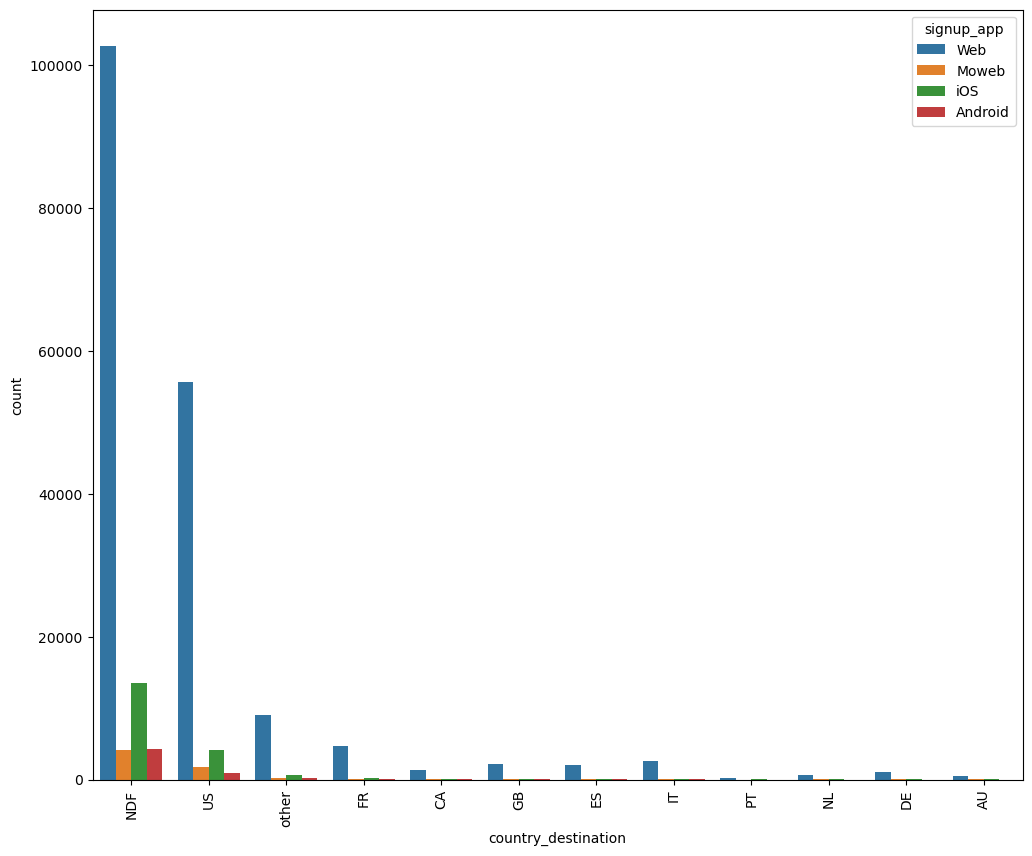

In [111]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='signup_app')
plt.xticks(rotation=90)
plt.show()

In [112]:
country_signup_app_counts = df_train.groupby('country_destination')['signup_app'].value_counts().reset_index(name='count')


country_signup_app_counts['rank'] = country_signup_app_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_3_signup_app_per_country = country_signup_app_counts[country_signup_app_counts['rank'] <= 3]


top_3_signup_app_per_country = top_3_signup_app_per_country.drop(columns=['rank'])

print(top_3_signup_app_per_country)

   country_destination signup_app   count
0                   AU        Web     490
1                   AU        iOS      32
2                   AU      Moweb      14
4                   CA        Web    1325
5                   CA        iOS      59
6                   CA      Moweb      29
8                   DE        Web     996
9                   DE        iOS      41
10                  DE      Moweb      15
12                  ES        Web    2085
13                  ES        iOS     105
14                  ES      Moweb      34
16                  FR        Web    4719
17                  FR        iOS     222
18                  FR      Moweb      56
20                  GB        Web    2159
21                  GB        iOS     116
22                  GB      Moweb      33
24                  IT        Web    2639
25                  IT        iOS     144
26                  IT      Moweb      31
28                 NDF        Web  102696
29                 NDF        iOS 

Web is the most common signup app followed by ios in all countries

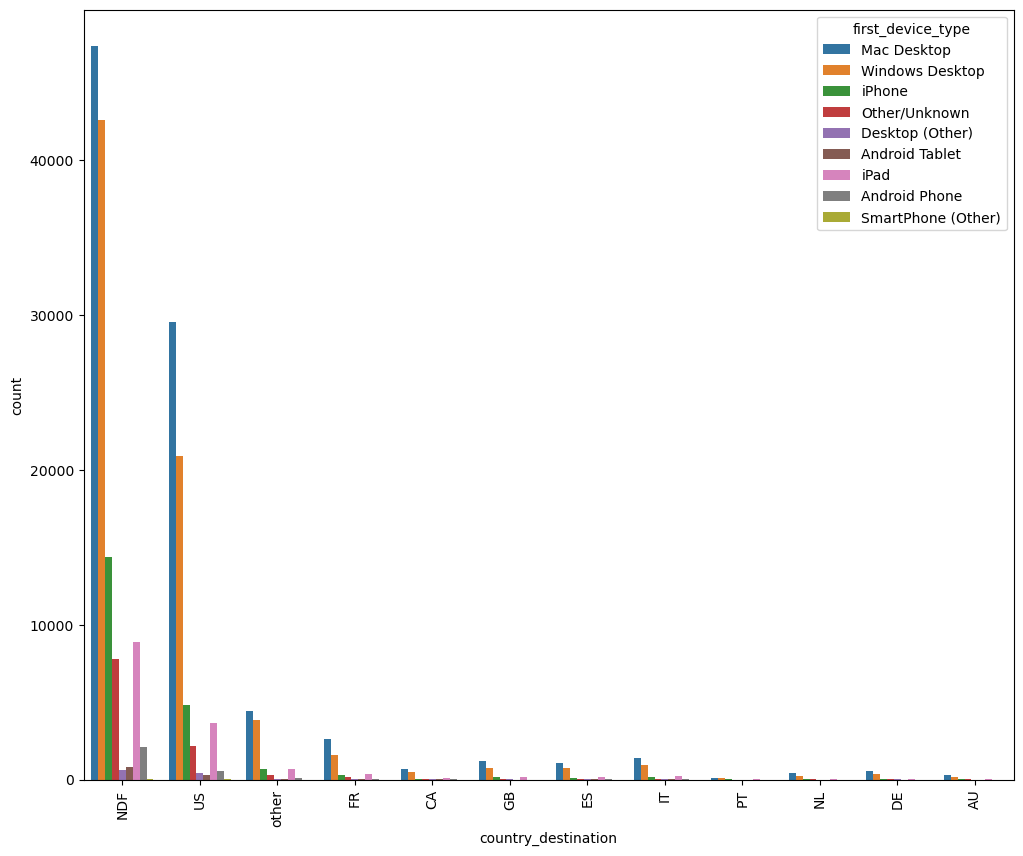

In [113]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_train, x='country_destination',hue='first_device_type')
plt.xticks(rotation=90)
plt.show()

In [114]:
country_first_device_type_counts = df_train.groupby('country_destination')['first_device_type'].value_counts().reset_index(name='count')


country_first_device_type_counts['rank'] = country_first_device_type_counts.groupby('country_destination')['count'].rank(method='first', ascending=False)


top_5_first_device_type_per_country = country_first_device_type_counts[country_first_device_type_counts['rank'] <= 5]


top_5_first_device_type_per_country = top_5_first_device_type_per_country.drop(columns=['rank'])

print(top_5_first_device_type_per_country)

   country_destination first_device_type  count
0                   AU       Mac Desktop    265
1                   AU   Windows Desktop    171
2                   AU              iPad     42
3                   AU            iPhone     36
4                   AU     Other/Unknown     18
8                   CA       Mac Desktop    679
9                   CA   Windows Desktop    520
10                  CA              iPad     78
11                  CA            iPhone     60
12                  CA     Other/Unknown     49
16                  DE       Mac Desktop    553
17                  DE   Windows Desktop    339
18                  DE              iPad     62
19                  DE            iPhone     60
20                  DE     Other/Unknown     25
24                  ES       Mac Desktop   1098
25                  ES   Windows Desktop    773
26                  ES              iPad    152
27                  ES            iPhone    130
28                  ES     Other/Unknown

Mac desktop is the most common first device type in all the countries, followed by windows desktop, ipad and iphone.

In [115]:
df_train.columns

Index(['id', 'timestamp_first_active', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'date_account_created_year',
       'date_account_created_month', 'date_account_created_day_name',
       'date_account_created_day', 'date_first_booking_year',
       'date_first_booking_month', 'date_first_booking_day_name',
       'date_first_booking_day'],
      dtype='object')

In [116]:
df = df_train.merge(session_pivot, left_on='id', right_on='user_id', how='inner')
df = df.drop(columns=['user_id'])
df.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,similar_listings_y,user_social_connections,update_listing,listing_reviews,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet,secs_elapsed
0,d1mm9tcy42,1970-01-01 05:35:40.101000936,MALE,62.0,basic,0,en,sem-non-brand,google,omg,...,9.0,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,3427529.0
1,yo8nz8bqcq,1970-01-01 05:35:40.101001558,-unknown-,NaN,basic,0,en,direct,direct,untracked,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,207842.0
2,4grx6yxeby,1970-01-01 05:35:40.101001639,-unknown-,NaN,basic,0,en,sem-brand,google,omg,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1135444.0
3,ncf87guaf0,1970-01-01 05:35:40.101002146,-unknown-,NaN,basic,0,en,direct,direct,linked,...,28.0,0.0,0.0,0.0,0.0,146.0,0.0,1.0,0.0,3755100.0
4,4rvqpxoh3h,1970-01-01 05:35:40.101002619,-unknown-,NaN,basic,25,en,direct,direct,untracked,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,2555.0


In [117]:
df['gender'].value_counts()

gender
-unknown-    37788
FEMALE       19105
MALE         16853
OTHER           69
Name: count, dtype: int64

In [118]:
 for i in df.columns:
        print(i)

id
timestamp_first_active
gender
age
signup_method
signup_flow
language
affiliate_channel
affiliate_provider
first_affiliate_tracked
signup_app
first_device_type
first_browser
country_destination
date_account_created_year
date_account_created_month
date_account_created_day_name
date_account_created_day
date_first_booking_year
date_first_booking_month
date_first_booking_day_name
date_first_booking_day
show
index
search_results
personalize
search
ajax_refresh_subtotal
update
similar_listings_x
social_connections
reviews
view
data
click
-unknown-_x
submit
view_search_results
p3
-unknown-_y
wishlist_content_update
user_profile
change_trip_characteristics
similar_listings_y
user_social_connections
update_listing
listing_reviews
Mac Desktop
Windows Desktop
iPhone
Android Phone
iPad Tablet
secs_elapsed


In [119]:
from sklearn.preprocessing import LabelEncoder

# Handle '-unknown-' as a separate category
df['gender_encoded'] = df['gender'].apply(lambda x: x if x != '-unknown-' else 'UNKNOWN')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'gender_encoded' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender_encoded'])

df['gender_encoded'].value_counts()
df=df.drop(columns=['gender'])


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73815 entries, 0 to 73814
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             73815 non-null  object        
 1   timestamp_first_active         73815 non-null  datetime64[ns]
 2   age                            41567 non-null  float64       
 3   signup_method                  73815 non-null  object        
 4   signup_flow                    73815 non-null  int64         
 5   language                       73815 non-null  object        
 6   affiliate_channel              73815 non-null  object        
 7   affiliate_provider             73815 non-null  object        
 8   first_affiliate_tracked        73513 non-null  object        
 9   signup_app                     73815 non-null  object        
 10  first_device_type              73815 non-null  object        
 11  first_browser  

In [121]:
df.head()

,id,timestamp_first_active,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,user_social_connections,update_listing,listing_reviews,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet,secs_elapsed,gender_encoded
0,d1mm9tcy42,1970-01-01 05:35:40.101000936,62.0,basic,0,en,sem-non-brand,google,omg,Web,...,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,3427529.0,1
1,yo8nz8bqcq,1970-01-01 05:35:40.101001558,NaN,basic,0,en,direct,direct,untracked,Web,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,207842.0,3
2,4grx6yxeby,1970-01-01 05:35:40.101001639,NaN,basic,0,en,sem-brand,google,omg,Web,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1135444.0,3
3,ncf87guaf0,1970-01-01 05:35:40.101002146,NaN,basic,0,en,direct,direct,linked,Web,...,0.0,0.0,0.0,0.0,146.0,0.0,1.0,0.0,3755100.0,3
4,4rvqpxoh3h,1970-01-01 05:35:40.101002619,NaN,basic,25,en,direct,direct,untracked,iOS,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,2555.0,3


In [122]:
df.isnull().sum()

id                                   0
timestamp_first_active               0
age                              32248
signup_method                        0
signup_flow                          0
language                             0
affiliate_channel                    0
affiliate_provider                   0
first_affiliate_tracked            302
signup_app                           0
first_device_type                    0
first_browser                        0
country_destination                  0
date_account_created_year            0
date_account_created_month           0
date_account_created_day_name        0
date_account_created_day             0
date_first_booking_year          45041
date_first_booking_month         45041
date_first_booking_day_name      45041
date_first_booking_day           45041
show                               409
index                              409
search_results                     409
personalize                        409
search                   

In [123]:


# Step 1: Computing the mode age for each country
mode_ages = df.groupby('country_destination')['age'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Step 2: Fill missing age values with the mode age of the respective country
df = df.merge(mode_ages, on='country_destination', suffixes=('', '_mode'))
df['age'].fillna(df['age_mode'], inplace=True)
df.drop(columns=['age_mode'], inplace=True)

# Resulting DataFrame with missing ages replaced
df.head()


,id,timestamp_first_active,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,user_social_connections,update_listing,listing_reviews,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet,secs_elapsed,gender_encoded
0,d1mm9tcy42,1970-01-01 05:35:40.101000936,62.0,basic,0,en,sem-non-brand,google,omg,Web,...,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,3427529.0,1
1,ro2stddszp,1970-01-01 05:35:40.101005503,19.0,basic,0,en,sem-brand,google,untracked,Web,...,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,1284401.0,3
2,ucgks2fyez,1970-01-01 05:35:40.101010900,76.0,basic,0,en,seo,yahoo,untracked,Web,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283.0,6808722.0,3
3,d6r5a2l398,1970-01-01 05:35:40.101081440,25.0,facebook,12,en,api,other,untracked,Android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440117.0,1
4,2pw9yjm8aq,1970-01-01 05:35:40.101091423,29.0,basic,0,en,seo,google,linked,Web,...,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1236605.0,3


In [124]:
df.isnull().sum()

id                                   0
timestamp_first_active               0
age                                  0
signup_method                        0
signup_flow                          0
language                             0
affiliate_channel                    0
affiliate_provider                   0
first_affiliate_tracked            302
signup_app                           0
first_device_type                    0
first_browser                        0
country_destination                  0
date_account_created_year            0
date_account_created_month           0
date_account_created_day_name        0
date_account_created_day             0
date_first_booking_year          45041
date_first_booking_month         45041
date_first_booking_day_name      45041
date_first_booking_day           45041
show                               409
index                              409
search_results                     409
personalize                        409
search                   

In [125]:
df['signup_method'].value_counts()

signup_method
basic       55135
facebook    18136
google        544
Name: count, dtype: int64

In [126]:


signup_method_mapping = {'basic': 1, 'google': 2, 'facebook': 3}

# Use the mapping to replace gender values with numerical values
df['signup_method_numeric'] = df['signup_method'].map(signup_method_mapping)
df=df.drop(columns=['signup_method'])

In [127]:
df.head()

,id,timestamp_first_active,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,update_listing,listing_reviews,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet,secs_elapsed,gender_encoded,signup_method_numeric
0,d1mm9tcy42,1970-01-01 05:35:40.101000936,62.0,0,en,sem-non-brand,google,omg,Web,Windows Desktop,...,0.0,0.0,0.0,122.0,0.0,0.0,0.0,3427529.0,1,1
1,ro2stddszp,1970-01-01 05:35:40.101005503,19.0,0,en,sem-brand,google,untracked,Web,Mac Desktop,...,0.0,0.0,43.0,0.0,0.0,0.0,0.0,1284401.0,3,1
2,ucgks2fyez,1970-01-01 05:35:40.101010900,76.0,0,en,seo,yahoo,untracked,Web,iPad,...,0.0,0.0,0.0,0.0,0.0,0.0,283.0,6808722.0,3,1
3,d6r5a2l398,1970-01-01 05:35:40.101081440,25.0,12,en,api,other,untracked,Android,Other/Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440117.0,1,3
4,2pw9yjm8aq,1970-01-01 05:35:40.101091423,29.0,0,en,seo,google,linked,Web,Windows Desktop,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1236605.0,3,1


In [128]:
df=df.drop(columns=['id','timestamp_first_active','date_account_created_day_name','date_first_booking_day_name','-unknown-_y','-unknown-_x'])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73815 entries, 0 to 73814
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          73815 non-null  float64
 1   signup_flow                  73815 non-null  int64  
 2   language                     73815 non-null  object 
 3   affiliate_channel            73815 non-null  object 
 4   affiliate_provider           73815 non-null  object 
 5   first_affiliate_tracked      73513 non-null  object 
 6   signup_app                   73815 non-null  object 
 7   first_device_type            73815 non-null  object 
 8   first_browser                73815 non-null  object 
 9   country_destination          73815 non-null  object 
 10  date_account_created_year    73815 non-null  int32  
 11  date_account_created_month   73815 non-null  int32  
 12  date_account_created_day     73815 non-null  int32  
 13  date_first_booki

In [130]:
df['secs_elapsed'].describe()

count    7.381500e+04
mean     1.514235e+06
std      1.913191e+06
min      0.000000e+00
25%      2.569205e+05
50%      8.728620e+05
75%      2.043488e+06
max      3.822136e+07
Name: secs_elapsed, dtype: float64

In [131]:
df['date_first_booking_year'].head()

0    2014.0
1    2014.0
2    2014.0
3    2014.0
4    2014.0
Name: date_first_booking_year, dtype: float64

In [132]:
df['date_first_booking_year'].fillna(2014,inplace=True)

In [133]:
df['date_first_booking_month'].fillna(0,inplace=True)
df['date_first_booking_day'].fillna(0,inplace=True)

In [134]:
df.dropna(subset=['view','data','click','submit','view_search_results','p3','wishlist_content_update','user_profile',
'change_trip_characteristics','user_social_connections','update_listing','listing_reviews'],inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73812 entries, 0 to 73814
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          73812 non-null  float64
 1   signup_flow                  73812 non-null  int64  
 2   language                     73812 non-null  object 
 3   affiliate_channel            73812 non-null  object 
 4   affiliate_provider           73812 non-null  object 
 5   first_affiliate_tracked      73510 non-null  object 
 6   signup_app                   73812 non-null  object 
 7   first_device_type            73812 non-null  object 
 8   first_browser                73812 non-null  object 
 9   country_destination          73812 non-null  object 
 10  date_account_created_year    73812 non-null  int32  
 11  date_account_created_month   73812 non-null  int32  
 12  date_account_created_day     73812 non-null  int32  
 13  date_first_booking_ye

In [136]:
df.isnull().sum()

age                              0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked        302
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
date_account_created_year        0
date_account_created_month       0
date_account_created_day         0
date_first_booking_year          0
date_first_booking_month         0
date_first_booking_day           0
show                           409
index                          409
search_results                 409
personalize                    409
search                         409
ajax_refresh_subtotal          409
update                         409
similar_listings_x             409
social_connections             409
reviews                        409
view                             0
data                             0
click               

In [137]:
df['show'].fillna(0.0,inplace=True)
df['index'].fillna(0.0,inplace=True)
df['search_results'].fillna(0.0,inplace=True)
df['personalize'].fillna(0.0,inplace=True)
df['search'].fillna(0.0,inplace=True)
df['ajax_refresh_subtotal'].fillna(0.0,inplace=True)
df['update'].fillna(0.0,inplace=True)
df['similar_listings_x'].fillna(0.0,inplace=True)
df['similar_listings_y'].fillna(0.0,inplace=True)
df['social_connections'].fillna(0.0,inplace=True)
df['reviews'].fillna(0.0,inplace=True)

In [138]:
df.isnull().sum()

age                              0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked        302
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
date_account_created_year        0
date_account_created_month       0
date_account_created_day         0
date_first_booking_year          0
date_first_booking_month         0
date_first_booking_day           0
show                             0
index                            0
search_results                   0
personalize                      0
search                           0
ajax_refresh_subtotal            0
update                           0
similar_listings_x               0
social_connections               0
reviews                          0
view                             0
data                             0
click               

In [139]:
df['first_affiliate_tracked'].value_counts()      

first_affiliate_tracked
untracked        39046
omg              18342
linked           14316
tracked-other      938
product            733
marketing          110
local ops           25
Name: count, dtype: int64

In [140]:
df['first_affiliate_tracked'].fillna('untracked', inplace=True)

In [141]:
df.isnull().sum()

age                            0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
date_account_created_year      0
date_account_created_month     0
date_account_created_day       0
date_first_booking_year        0
date_first_booking_month       0
date_first_booking_day         0
show                           0
index                          0
search_results                 0
personalize                    0
search                         0
ajax_refresh_subtotal          0
update                         0
similar_listings_x             0
social_connections             0
reviews                        0
view                           0
data                           0
click                          0
submit                         0
view_searc

In [142]:
df.head()

,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,...,update_listing,listing_reviews,Mac Desktop,Windows Desktop,iPhone,Android Phone,iPad Tablet,secs_elapsed,gender_encoded,signup_method_numeric
0,62.0,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,...,0.0,0.0,0.0,122.0,0.0,0.0,0.0,3427529.0,1,1
1,19.0,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other,...,0.0,0.0,43.0,0.0,0.0,0.0,0.0,1284401.0,3,1
2,76.0,0,en,seo,yahoo,untracked,Web,iPad,Mobile Safari,other,...,0.0,0.0,0.0,0.0,0.0,0.0,283.0,6808722.0,3,1
3,25.0,12,en,api,other,untracked,Android,Other/Unknown,-unknown-,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440117.0,1,3
4,29.0,0,en,seo,google,linked,Web,Windows Desktop,Chrome,other,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1236605.0,3,1


In [143]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['language'].unique())

# Transform the 'language' column to numerical values
df['language_encoded'] = label_encoder.transform(df['language'])
df.drop(columns='language',inplace=True)

In [144]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['affiliate_channel'].unique())

# Transform the 'language' column to numerical values
df['affiliate_channel_encoded'] = label_encoder.transform(df['affiliate_channel'])
df.drop(columns='affiliate_channel',inplace=True)

In [145]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['affiliate_provider'].unique())

# Transform the 'language' column to numerical values
df['affiliate_provider_encoded'] = label_encoder.transform(df['affiliate_provider'])
df.drop(columns='affiliate_provider',inplace=True)

In [146]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['country_destination'].unique())

# Transform the 'language' column to numerical values
df['country_destination_encoded'] = label_encoder.transform(df['country_destination'])
df.drop(columns='country_destination',inplace=True)

In [147]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['first_affiliate_tracked'].unique())

# Transform the 'language' column to numerical values
df['first_affiliate_tracked_encoded'] = label_encoder.transform(df['first_affiliate_tracked'])
df.drop(columns='first_affiliate_tracked',inplace=True)

In [148]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['signup_app'].unique())

# Transform the 'language' column to numerical values
df['signup_app_encoded'] = label_encoder.transform(df['signup_app'])
df.drop(columns='signup_app',inplace=True)

In [149]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['first_device_type'].unique())

# Transform the 'language' column to numerical values
df['first_device_type_encoded'] = label_encoder.transform(df['first_device_type'])
df.drop(columns='first_device_type',inplace=True)

In [150]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the unique language values
label_encoder.fit(df['first_browser'].unique())

# Transform the 'language' column to numerical values
df['first_browser_encoded'] = label_encoder.transform(df['first_browser'])
df.drop(columns='first_browser',inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73812 entries, 0 to 73814
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              73812 non-null  float64
 1   signup_flow                      73812 non-null  int64  
 2   date_account_created_year        73812 non-null  int32  
 3   date_account_created_month       73812 non-null  int32  
 4   date_account_created_day         73812 non-null  int32  
 5   date_first_booking_year          73812 non-null  float64
 6   date_first_booking_month         73812 non-null  float64
 7   date_first_booking_day           73812 non-null  float64
 8   show                             73812 non-null  float64
 9   index                            73812 non-null  float64
 10  search_results                   73812 non-null  float64
 11  personalize                      73812 non-null  float64
 12  search                 

In [152]:
df.head()

,age,signup_flow,date_account_created_year,date_account_created_month,date_account_created_day,date_first_booking_year,date_first_booking_month,date_first_booking_day,show,index,...,gender_encoded,signup_method_numeric,language_encoded,affiliate_channel_encoded,affiliate_provider_encoded,country_destination_encoded,first_affiliate_tracked_encoded,signup_app_encoded,first_device_type_encoded,first_browser_encoded
0,62.0,0,2014,1,1,2014.0,1.0,4.0,28.0,11.0,...,1,1,5,6,8,11,3,2,6,6
1,19.0,0,2014,1,1,2014.0,12.0,4.0,6.0,5.0,...,3,1,5,5,8,11,6,2,3,26
2,76.0,0,2014,1,1,2014.0,12.0,18.0,70.0,9.0,...,3,1,5,7,15,11,6,2,7,19
3,25.0,12,2014,1,1,2014.0,3.0,12.0,12.0,6.0,...,1,3,5,0,12,11,6,0,4,0
4,29.0,0,2014,1,1,2014.0,1.0,1.0,0.0,0.0,...,3,1,5,7,8,11,0,2,6,6


In [153]:
df.isnull().sum()

age                                0
signup_flow                        0
date_account_created_year          0
date_account_created_month         0
date_account_created_day           0
date_first_booking_year            0
date_first_booking_month           0
date_first_booking_day             0
show                               0
index                              0
search_results                     0
personalize                        0
search                             0
ajax_refresh_subtotal              0
update                             0
similar_listings_x                 0
social_connections                 0
reviews                            0
view                               0
data                               0
click                              0
submit                             0
view_search_results                0
p3                                 0
wishlist_content_update            0
user_profile                       0
change_trip_characteristics        0
s

In [154]:
x=df.drop('country_destination_encoded',axis=1)
y=df['country_destination_encoded']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset and preprocess it as needed.

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choose a multi-class classification model (e.g., Random Forest).
model = RandomForestClassifier()

# Train the model on the training data.
model.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred = model.predict(X_test)

# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.score(X_train, y_train))
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


0.9999830649121916
Accuracy: 0.8957528957528957
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        53
           3       1.00      0.06      0.11       143
           4       0.71      0.04      0.07       278
           5       0.00      0.00      0.00       134
           6       0.71      0.03      0.05       189
           7       1.00      1.00      1.00      9069
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        15
          10       0.73      1.00      0.84      3999
          11       0.71      0.21      0.32       727

    accuracy                           0.90     14763
   macro avg       0.41      0.19      0.20     14763
weighted avg       0.88      0.90      0.86     14763



Lets try bagging and boosting to improve performance of  model

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare your dataset (X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)
print("Score:",random_forest.score(X_train, y_train))


# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Score: 0.9999661298243832
Random Forest Classifier:
Accuracy: 0.8955496850233692
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        53
           3       1.00      0.02      0.04       143
           4       0.71      0.04      0.08       278
           5       0.00      0.00      0.00       134
           6       0.50      0.01      0.02       189
           7       1.00      1.00      1.00      9069
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        15
          10       0.73      1.00      0.84      3999
          11       0.72      0.21      0.32       727

    accuracy                           0.90     14763
   macro avg       0.39      0.19      0.19     14763
weighted avg       0.88      0.90      0.86     14763



Lets try boosting

In [156]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)
print("Score:",adaboost.score(X_train, y_train))

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("AdaBoost Classifier:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Score: 0.8812850344629037
AdaBoost Classifier:
Accuracy: 0.8844408318092528
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00       143
           4       0.00      0.00      0.00       278
           5       0.00      0.00      0.00       134
           6       0.00      0.00      0.00       189
           7       1.00      1.00      1.00      9069
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        15
          10       0.70      1.00      0.82      3999
          11       0.00      0.00      0.00       727

    accuracy                           0.88     14763
   macro avg       0.14      0.17      0.15     14763
weighted avg       0.80      0.88      0.84     14763



###### Here we can see scores and accuracy are almost same so there is no overfitting and our model is working 